In [13]:
import pandas as pd
from datetime import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

In [17]:
# https://www.cryptoarchive.com.au/asset/DOGE --> Doge EUR
folderpath = "../../Data/QMEF/"

df = pd.read_csv(folderpath + 'DOGEUSDT.csv', sep='|', header=None)

# https://www.cryptoarchive.com.au/faq
df.columns = ['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Taker Buy Quote Asset Volume', 
                'Taker Buy Base Asset Volume', 'Quote Asset Volume', 'Number of trades']
# Quote Asset Volume verwenden. Volume ist im Verhältnis zu BTC.

df

timestamp     Open      High       Low     Close      Volume  \
0        1562328000  0.00449  0.004600  0.003760  0.004200  60726008.0   
1        1562328060  0.00420  0.004387  0.004200  0.004300  84307704.0   
2        1562328120  0.00430  0.004475  0.004300  0.004475  48182744.0   
3        1562328180  0.00445  0.004450  0.004169  0.004250  66457853.0   
4        1562328240  0.00425  0.004385  0.004250  0.004350  22016425.0   
...             ...      ...       ...       ...       ...         ...   
2129373  1690274520  0.07634  0.076400  0.076300  0.076310   3397058.0   
2129374  1690274580  0.07630  0.076300  0.076030  0.076150   5322564.0   
2129375  1690274640  0.07615  0.076160  0.075640  0.075960  10316943.0   
2129376  1690274700  0.07597  0.076180  0.075950  0.076170   7391049.0   
2129377  1690274760  0.07618  0.076240  0.076110  0.076180   4578144.0   

         Taker Buy Quote Asset Volume  Taker Buy Base Asset Volume  \
0                            175346.0                   40516981.0   
1                            173855.0                   40173084.0   
2                            144634.0                   33036098.0   
3                             35933.0                    8266236.0   
4                             43020.0                    9954068.0   
...                               ...                          ...   
2129373                      146491.0                    1918939.0   
2129374                      149650.0                    1965814.0   
2129375                      279871.0                    3685975.0   
2129376                      274058.0                    3601303.0   
2129377                      224089.0                    2941079.0   

         Quote Asset Volume  Number of trades  
0                  259378.0               521  
1                  363011.0               561  
2                  210232.0               291  
3                  285858.0               289  
4                   95311.0               179  
...                     ...               ...  
2129373            259348.0               403  
2129374            405259.0               840  
2129375            783300.0              1978  
2129376            562510.0               623  
2129377            348803.0               347  

[2129378 rows x 10 columns]

In [45]:
df_tweets = pd.read_csv("../../Data/QMEF/doge_tweet_analysis.csv", sep=";", encoding='utf8', parse_dates=['CreatedAt', 'UTC'])
df_tweets.drop_duplicates('TweetId', inplace = True)

df_tweets['timestamp'] = df_tweets['UTC'].apply(lambda x: x.astype('int')//10**9)
df_tweets['timestamp'] = df_tweets['timestamp'] - (df_tweets['timestamp'] % 60) #Abrunden auf Minuten

df_tweets = df_tweets[['UTC', 'timestamp', 'Text', 'Favorites', 'Retweets', 'neg', 'neu', 'pos', 'compound']]
# df_tweets = df_tweets.merge(df_doge, left_on='Date', right_on='Date')
# df_tweets_relevant = df_tweets.loc[(df_tweets['Favorites'] >= 500_000) & (df_tweets['Retweets'] >= 50_000)].copy()

df_tweets['UTC'] = pd.to_datetime(df_tweets['UTC'])
# Zeitdauer von 6 Stunden
time_threshold = timedelta(hours=6)

# Liste für Zeilen, die behalten werden sollen
df_tweets_relevant = []

# Iteriere über jeden Eintrag im DataFrame
for index, row in df_tweets.iterrows():
    utc_time = row['UTC']
    
    # Überprüfe die Differenz zur 'UTC'-Spalte aller anderen Einträge
    time_difference = abs(df_tweets.loc[df_tweets.index != index, 'UTC'] - utc_time)
    
    # Wenn die Differenz größer oder gleich 6 Stunden ist, behalte den Eintrag
    if (time_difference >= time_threshold).all():
        df_tweets_relevant.append(index)

# Filtere den DataFrame nach den ausgewählten Zeilen
df_tweets_relevant = df_tweets.loc[df_tweets_relevant]
df_tweets_relevant.drop([3, 18], inplace=True) # Löschen der Tweets, weil in der Doge-Coin-Zeitreihe hier Preise fehlen.
df_tweets_relevant

UTC   timestamp  \
4  2021-02-20 08:42:28+00:00  1613810520   
5  2021-02-06 08:42:25+00:00  1612600920   
6  2021-03-15 23:11:50+00:00  1615849860   
7  2021-03-01 19:57:08+00:00  1614628620   
8  2021-02-08 05:27:36+00:00  1612762020   
9  2021-02-10 15:08:11+00:00  1612969680   
10 2021-04-28 06:20:47+00:00  1619590800   
11 2020-11-17 18:45:21+00:00  1605638700   
12 2021-05-11 08:13:35+00:00  1620720780   
13 2021-03-02 21:07:09+00:00  1614719220   
14 2021-03-02 08:36:34+00:00  1614674160   
15 2021-05-13 22:45:16+00:00  1620945900   
16 2021-03-18 21:17:16+00:00  1616102220   
17 2021-02-11 23:27:37+00:00  1613086020   
24 2021-04-01 10:25:23+00:00  1617272700   
27 2021-05-09 22:41:43+00:00  1620600060   
28 2021-02-21 21:27:06+00:00  1613942820   
31 2021-02-07 22:25:14+00:00  1612736700   
32 2020-12-20 09:30:04+00:00  1608456600   

                                                 Text  Favorites  Retweets  \
4   @dogecoin I just set up some little Doge minin...      55888      6793   
5                                  @Grimezsz Dogecake       9598      1317   
6                                   @beeple 420M Doge      80386      5142   
7   Doge meme shield (legendary item) https://t.co...     284931     26875   
8   @itsALLrisky Doge appears to be inflationary, ...      15504      3567   
9   Bought some Dogecoin for lil X, so he can be a...     548940     59215   
10                           The Dogefather SNL May 8     465278     80539   
11          @ReflexFunds @nickidk4 @pcgamer Dojo/Doge       1027        74   
12                  Do you want Tesla to accept Doge?     386790     98651   
13  @WootiezTV Very much so &amp; its leader shall...      16155      1668   
14                 @draecomino 2022: Dogecoin is dumb      14387      2001   
15  Working with Doge devs to improve system trans...     512735     84083   
16              @lexfridman Sometimes it’s about Doge      49584      3603   
17                    @gtera27 Doge is underestimated      28838      8579   
24  SpaceX is going to put a literal Dogecoin on t...     547562     53429   
27  SpaceX launching satellite Doge-1 to the moon ...     537909    118943   
28                                        Dojo 4 Doge     327182     32894   
31                           🎶 Who let the Doge out 🎶     787296    114617   
32                                     One word: Doge     222692     26258   

      neg    neu    pos  compound  
4   0.000  0.820  0.180    0.5106  
5   0.000  1.000  0.000    0.0000  
6   0.000  1.000  0.000    0.0000  
7   0.000  1.000  0.000    0.0000  
8   0.132  0.787  0.081   -0.3291  
9   0.000  1.000  0.000    0.0000  
10  0.000  1.000  0.000    0.0000  
11  0.000  1.000  0.000    0.0000  
12  0.000  0.562  0.438    0.4404  
13  0.000  1.000  0.000    0.0000  
14  0.452  0.548  0.000   -0.5106  
15  0.000  0.497  0.503    0.7964  
16  0.000  1.000  0.000    0.0000  
17  0.412  0.588  0.000   -0.2732  
24  0.000  1.000  0.000    0.0000  
27  0.000  1.000  0.000    0.0000  
28  0.000  1.000  0.000    0.0000  
31  0.000  1.000  0.000    0.0000  
32  0.000  1.000  0.000    0.0000

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  0.0001166578310119093
T[0; 1] =  4.239183201792826
T[0; 5] =  1.5747751753185093
T[0; 10] =  2.6926451838140664
T[0; 30] =  0.7137333526559749
T[0; 60] =  0.5369900128056214
T[0; 120] =  0.026008854642363053


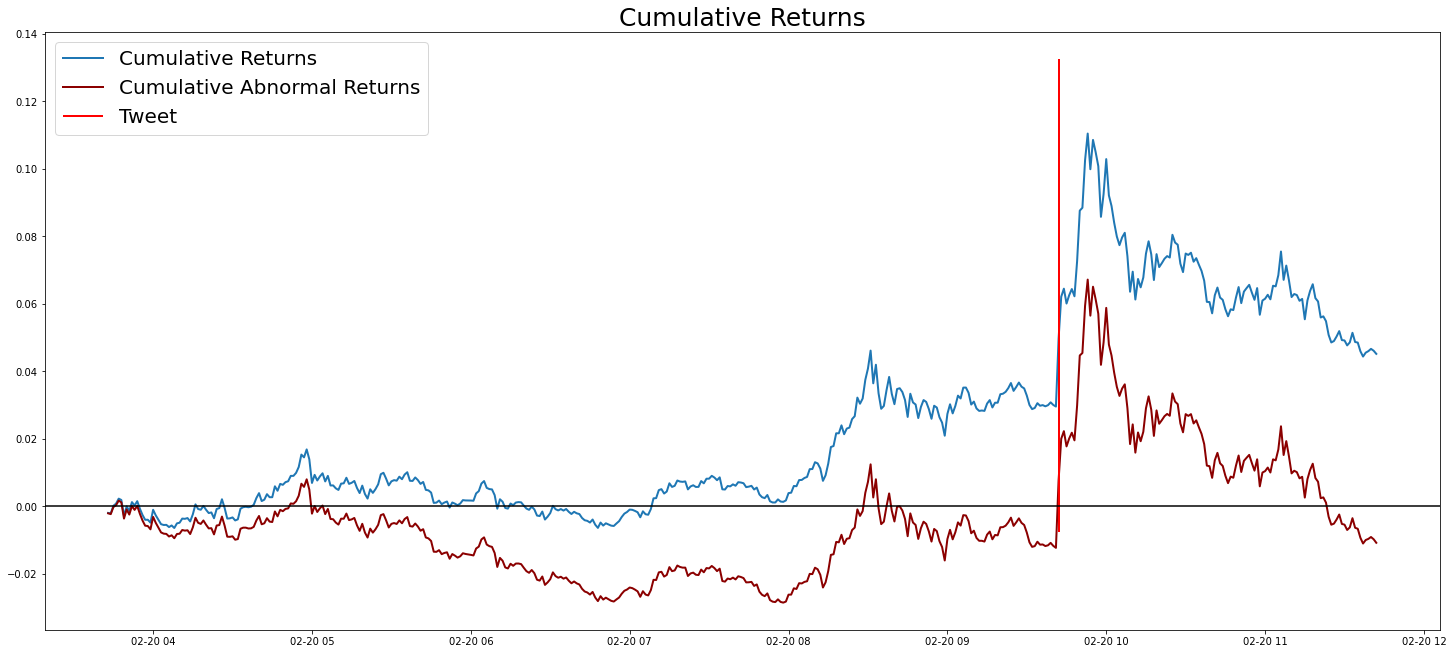

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  0.00011954122636684032
T[0; 1] =  -0.16328146644376756
T[0; 5] =  -1.2711323826031402
T[0; 10] =  -1.112601150300769
T[0; 30] =  -1.285370986835372
T[0; 60] =  -0.7091467927746506
T[0; 120] =  0.3157255846133703


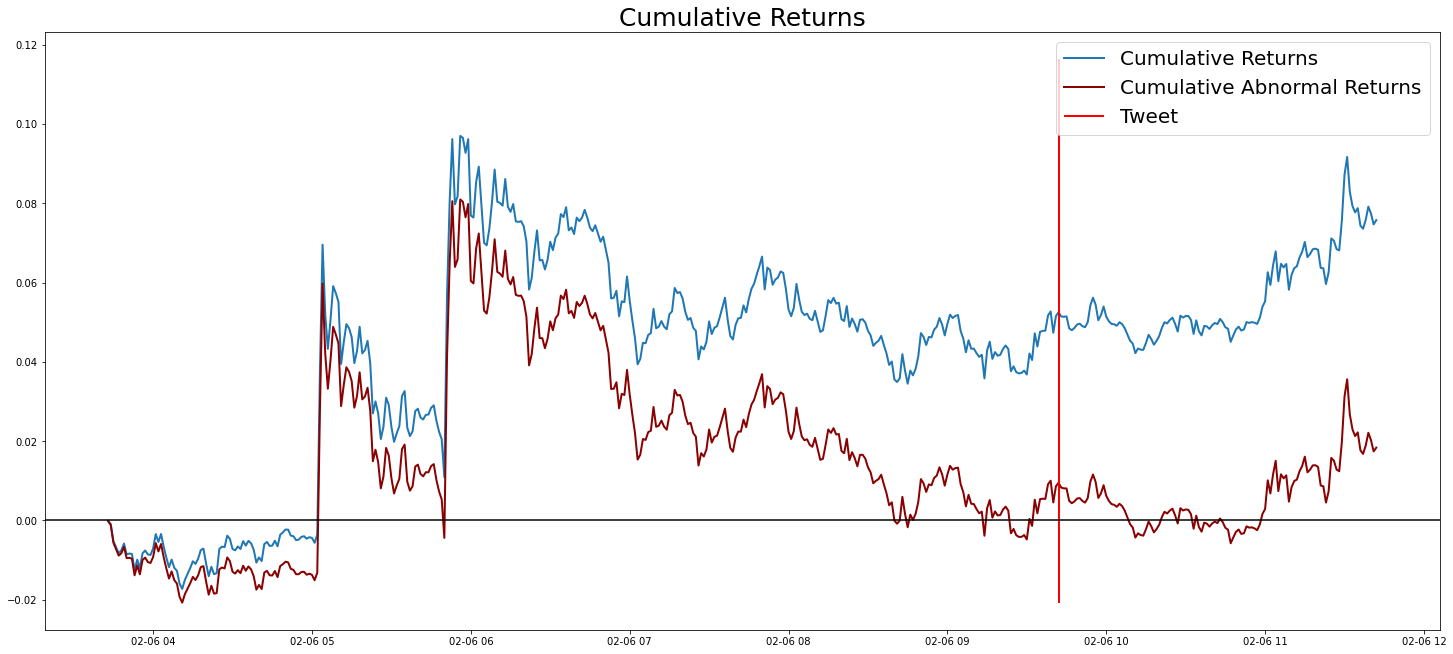

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  5.7995718885262655e-05
T[0; 1] =  1.4188780114235486
T[0; 5] =  1.4813755728600884
T[0; 10] =  0.45768563865361056
T[0; 30] =  0.04662629527319552
T[0; 60] =  -0.11489864064116766
T[0; 120] =  -1.06582919318792


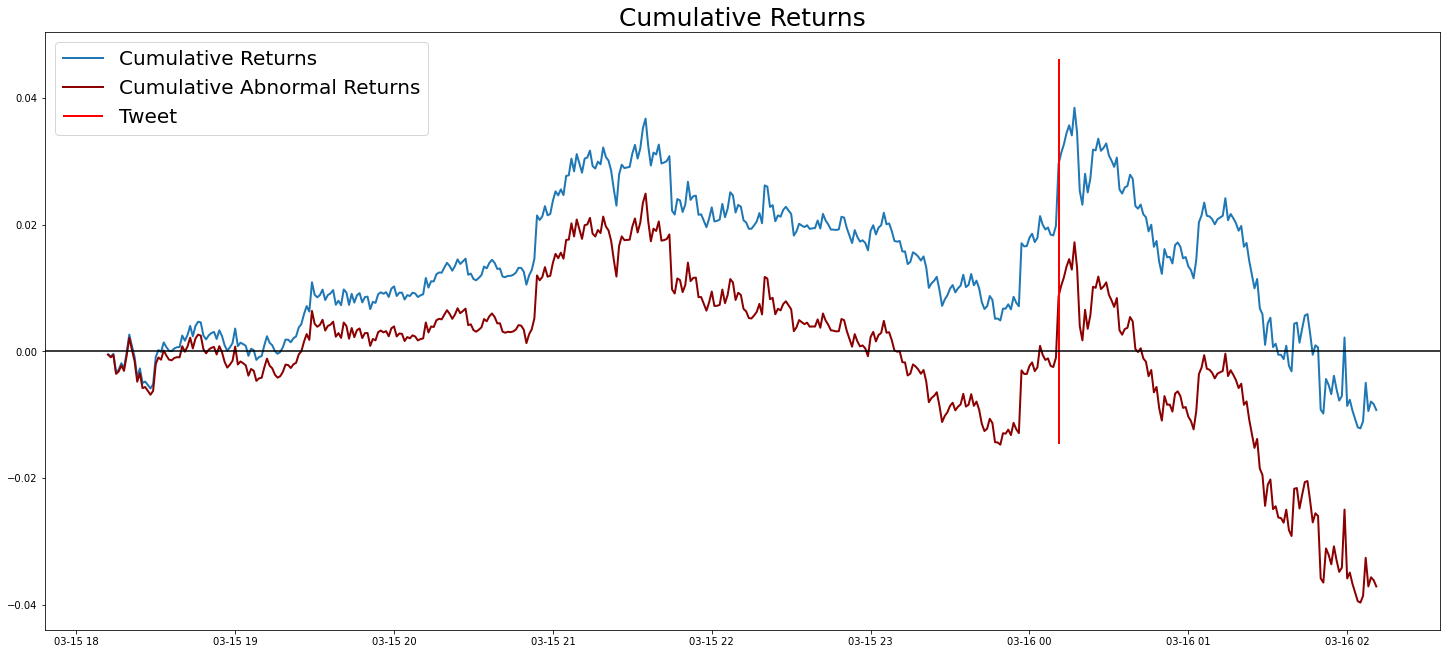

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -5.2747043932395145e-05
T[0; 1] =  3.471426411820988
T[0; 5] =  0.6734820962033435
T[0; 10] =  0.5624173985724984
T[0; 30] =  0.34635942840628403
T[0; 60] =  0.31852174071716244
T[0; 120] =  0.6646279246344333


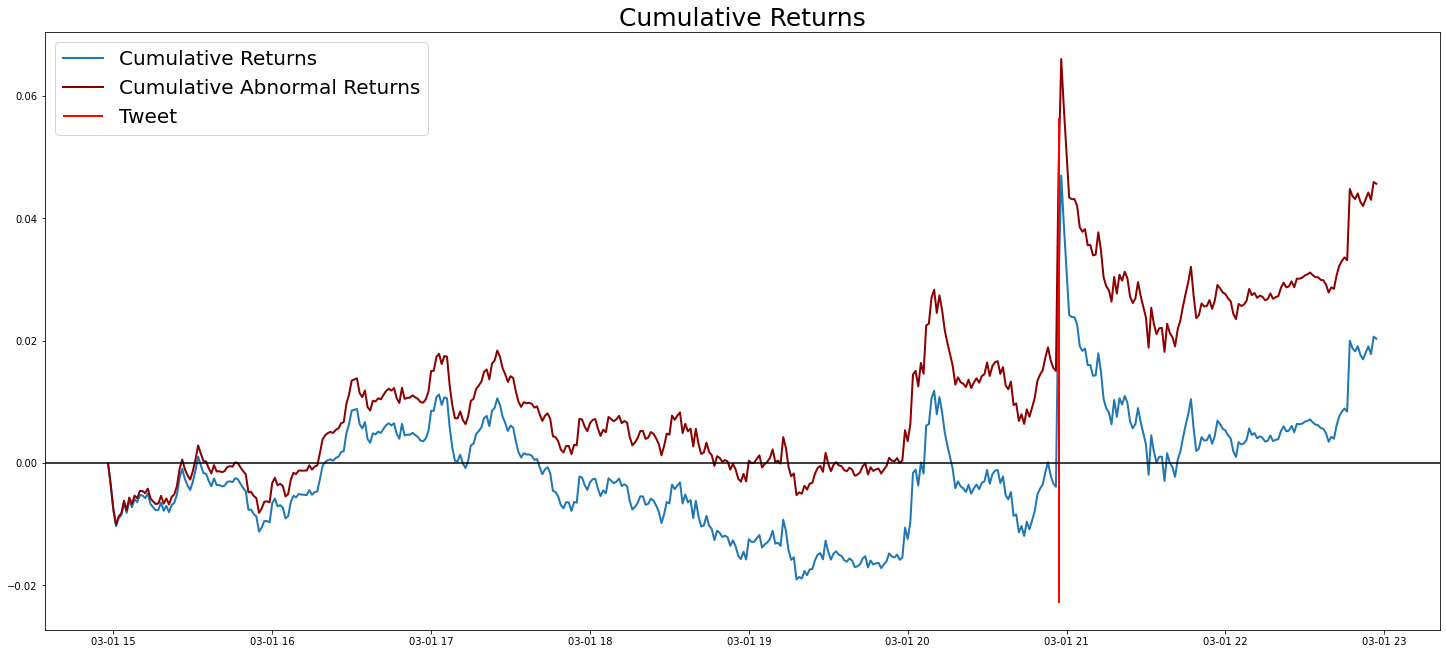

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -0.0004238815129562764
T[0; 1] =  -0.23640227061358837
T[0; 5] =  -0.2141006362264407
T[0; 10] =  -0.4867143689719467
T[0; 30] =  -0.6541440681748888
T[0; 60] =  0.1716399118983704
T[0; 120] =  -0.2102634891077464


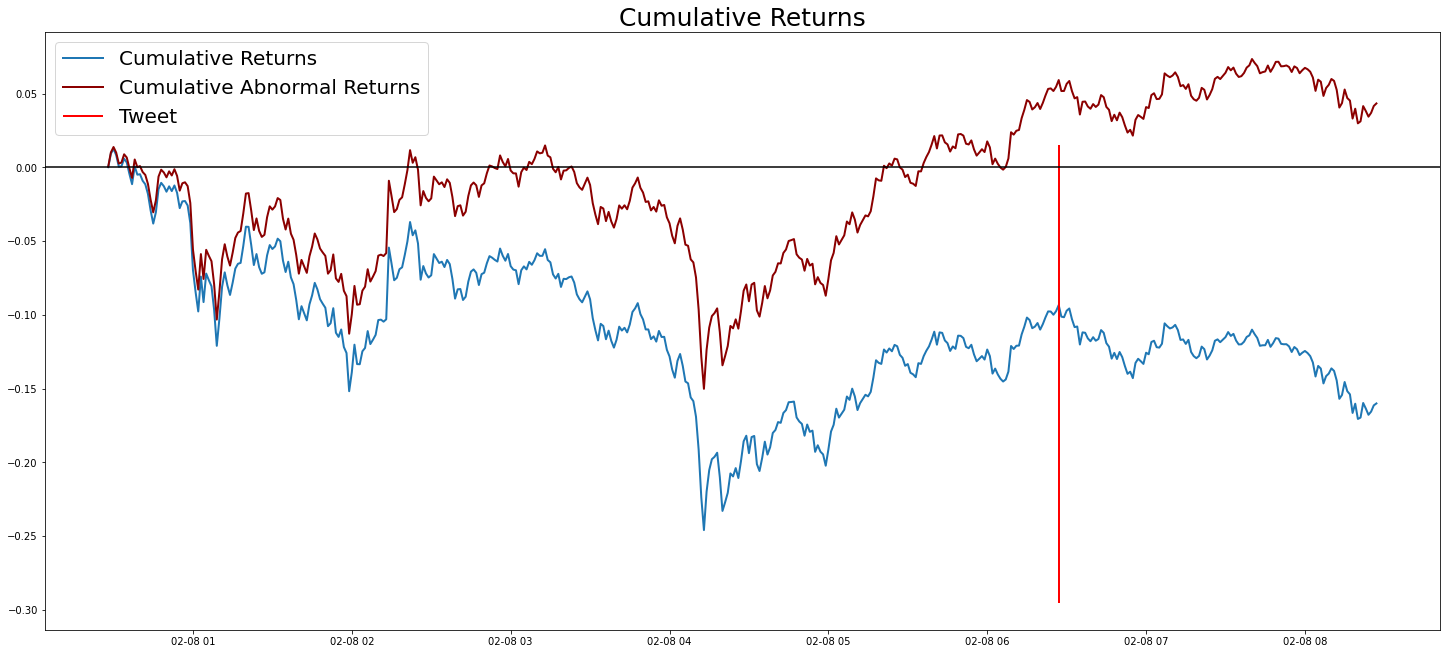

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -6.435561389600386e-05
T[0; 1] =  4.17580273808606
T[0; 5] =  1.462504480269266
T[0; 10] =  1.5420922000109087
T[0; 30] =  0.8478133502814132
T[0; 60] =  0.7335102491624159
T[0; 120] =  0.6442803298185706


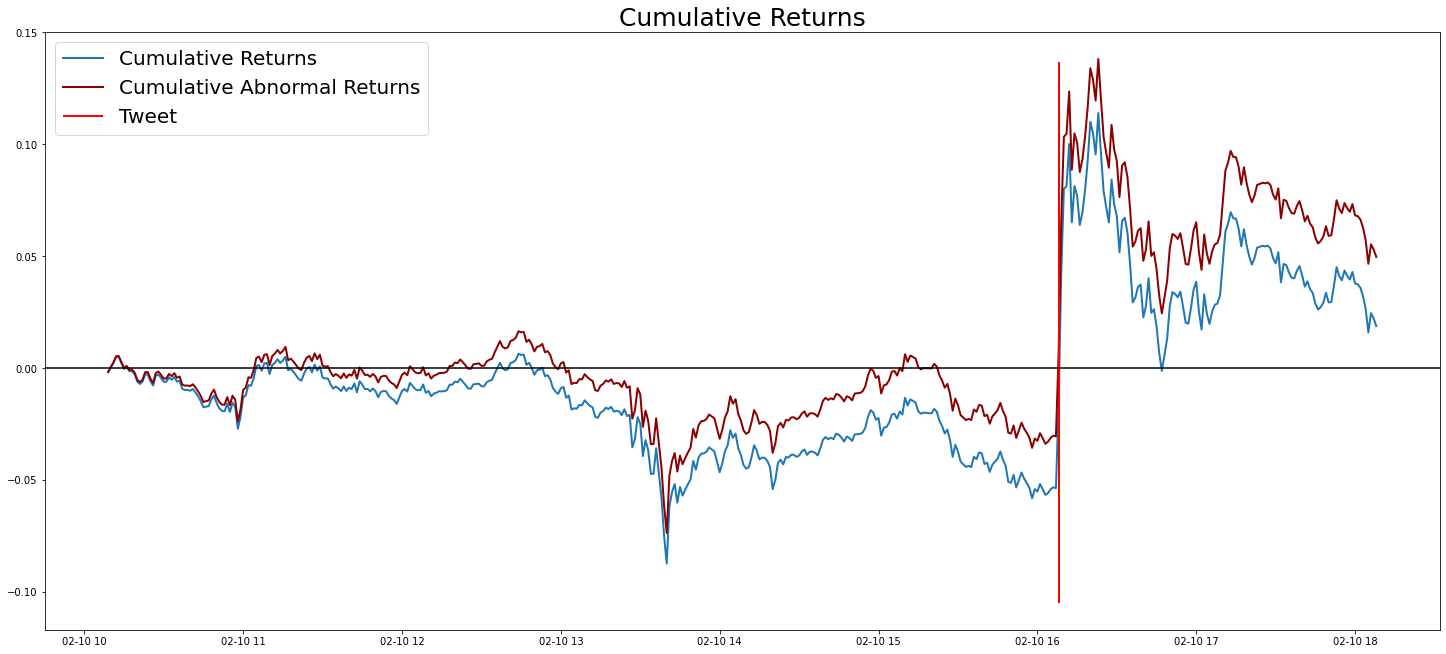

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -7.125517873890502e-05
T[0; 1] =  2.057894214473867
T[0; 5] =  2.3135636062895784
T[0; 10] =  3.3267533243879055
T[0; 30] =  1.3131808463440517
T[0; 60] =  0.9673812016193302
T[0; 120] =  1.0346880213261402


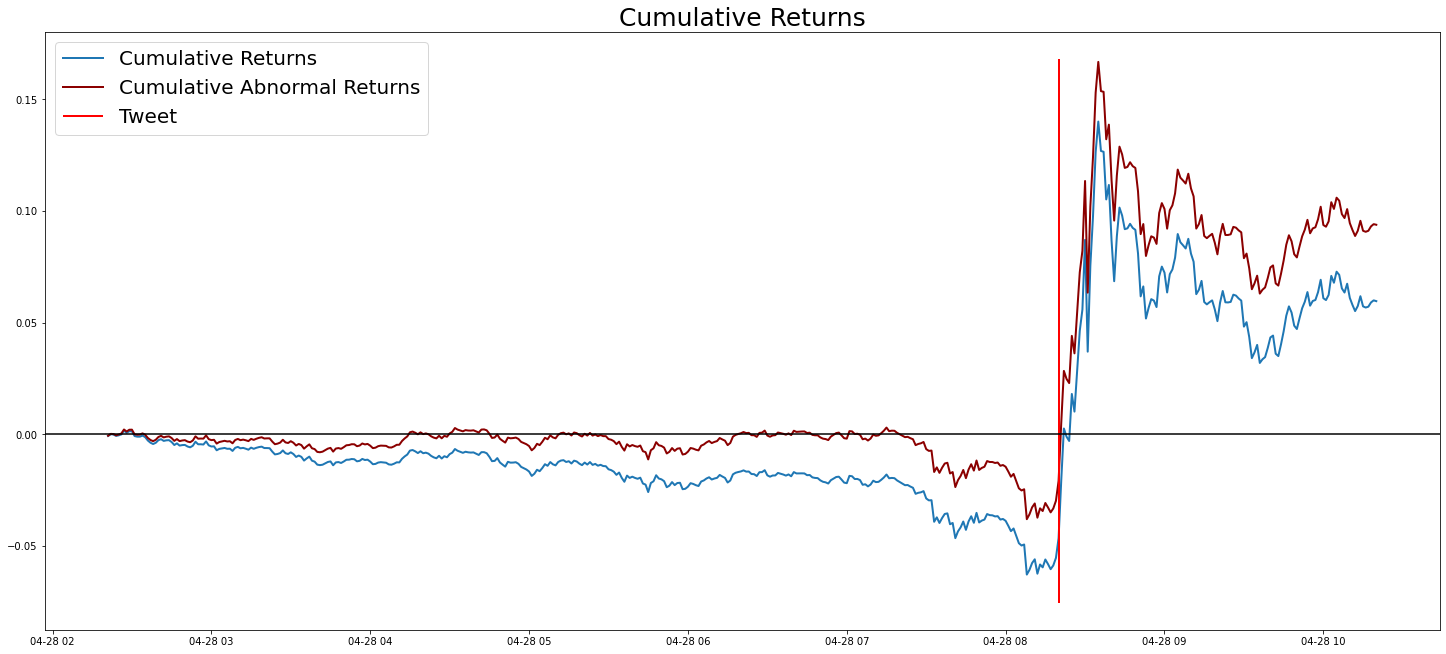

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  1.8498899864579395e-05
T[0; 1] =  -0.742858230226308
T[0; 5] =  0.34769274928255206
T[0; 10] =  0.3434943753487658
T[0; 30] =  0.8439180096923926
T[0; 60] =  0.9135776921293787
T[0; 120] =  0.5134024010491871


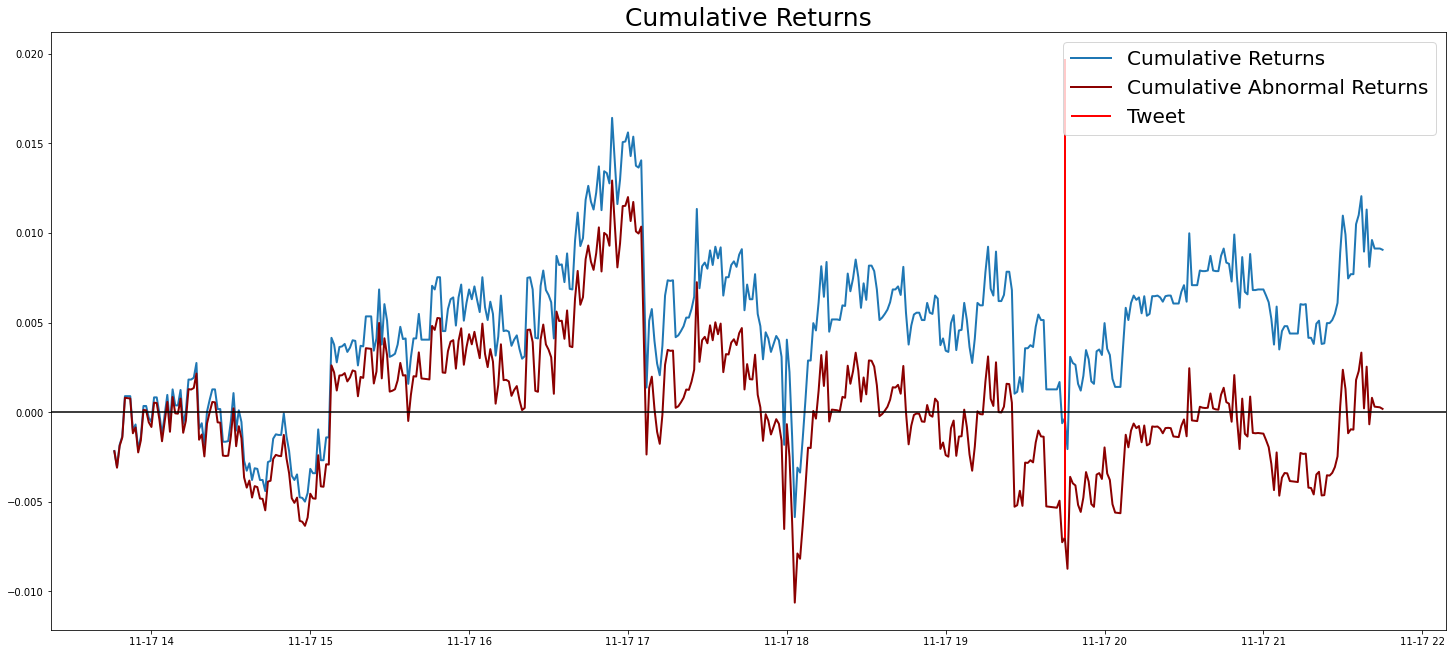

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  9.10511907813602e-05
T[0; 1] =  4.951959138097377
T[0; 5] =  4.39810827453629
T[0; 10] =  2.918633556439251
T[0; 30] =  1.4074052023364345
T[0; 60] =  1.0164040398520136
T[0; 120] =  0.9568517187046711


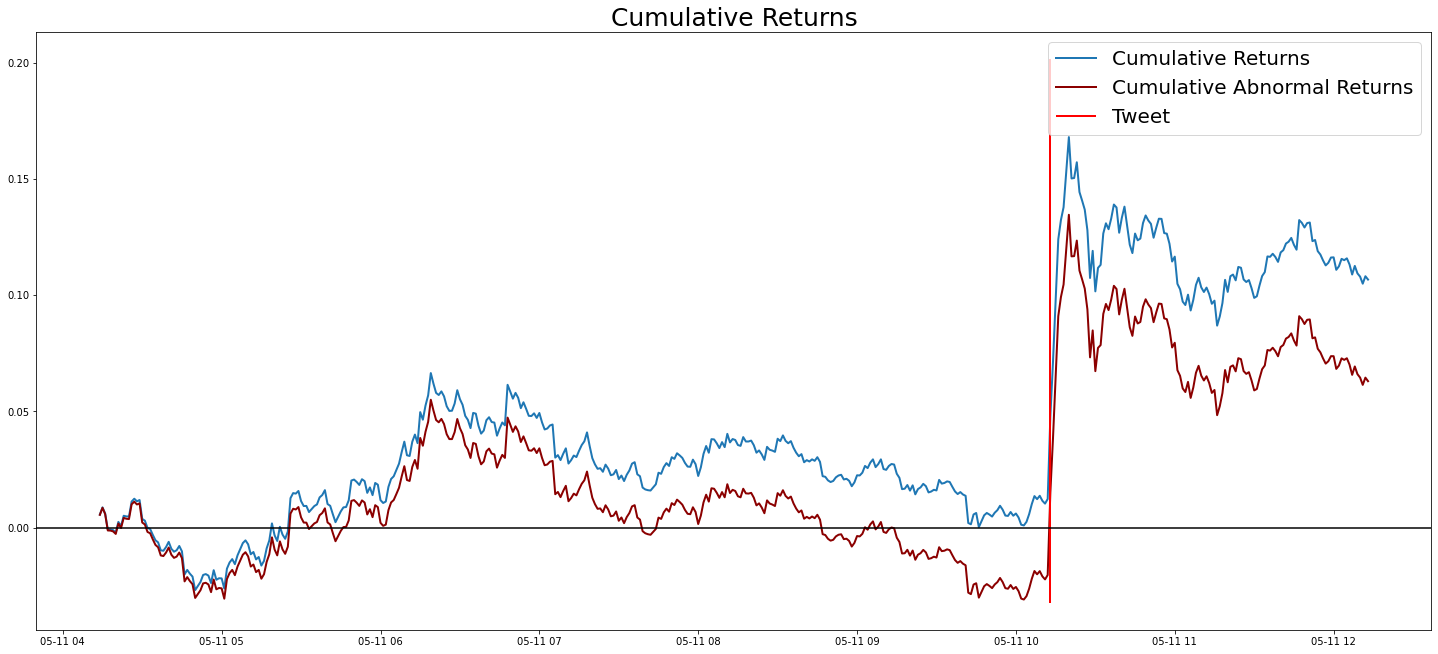

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -8.575581004954297e-05
T[0; 1] =  0.7647750857778668
T[0; 5] =  0.022201764625641413
T[0; 10] =  -0.16977535540298577
T[0; 30] =  -0.6460620992045436
T[0; 60] =  0.30451047639646006
T[0; 120] =  0.5881454626765883


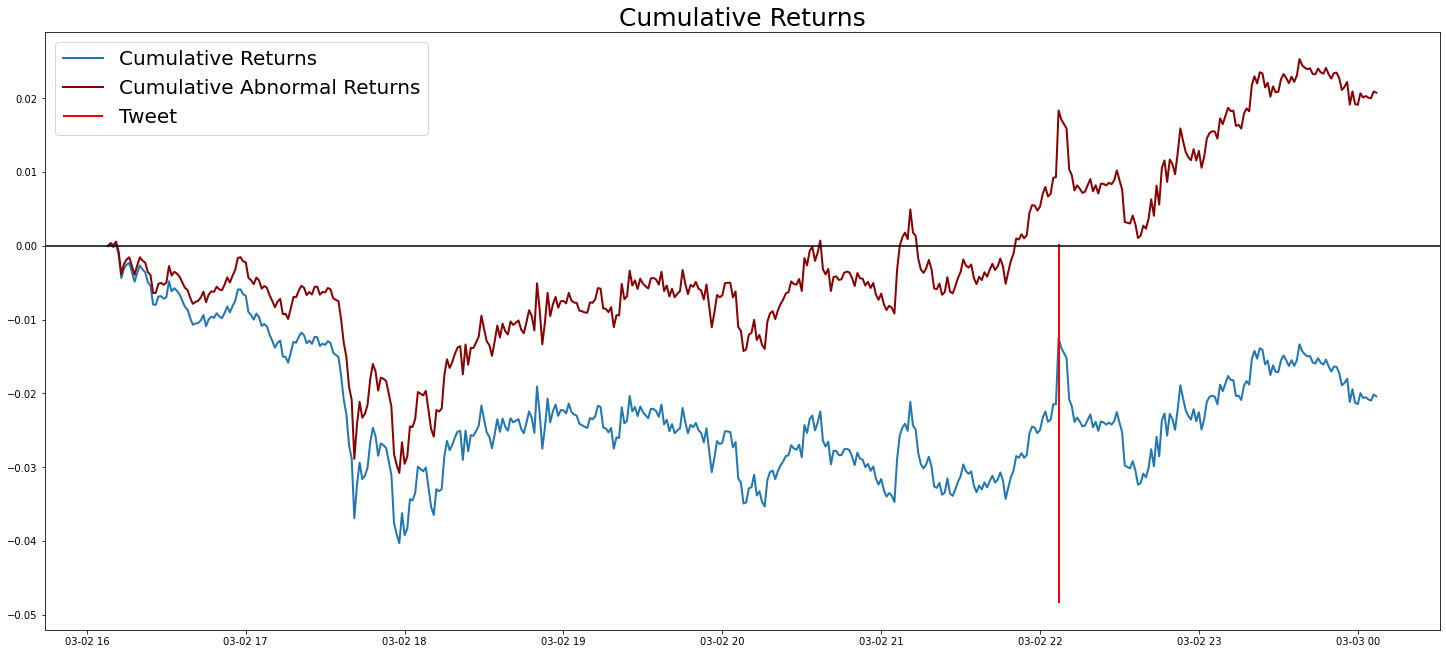

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -0.00010039549519261607
T[0; 1] =  2.113333268326683
T[0; 5] =  1.0258720188655341
T[0; 10] =  0.877224295833998
T[0; 30] =  0.5812178387781481
T[0; 60] =  0.7533592923855481
T[0; 120] =  1.0635008610087908


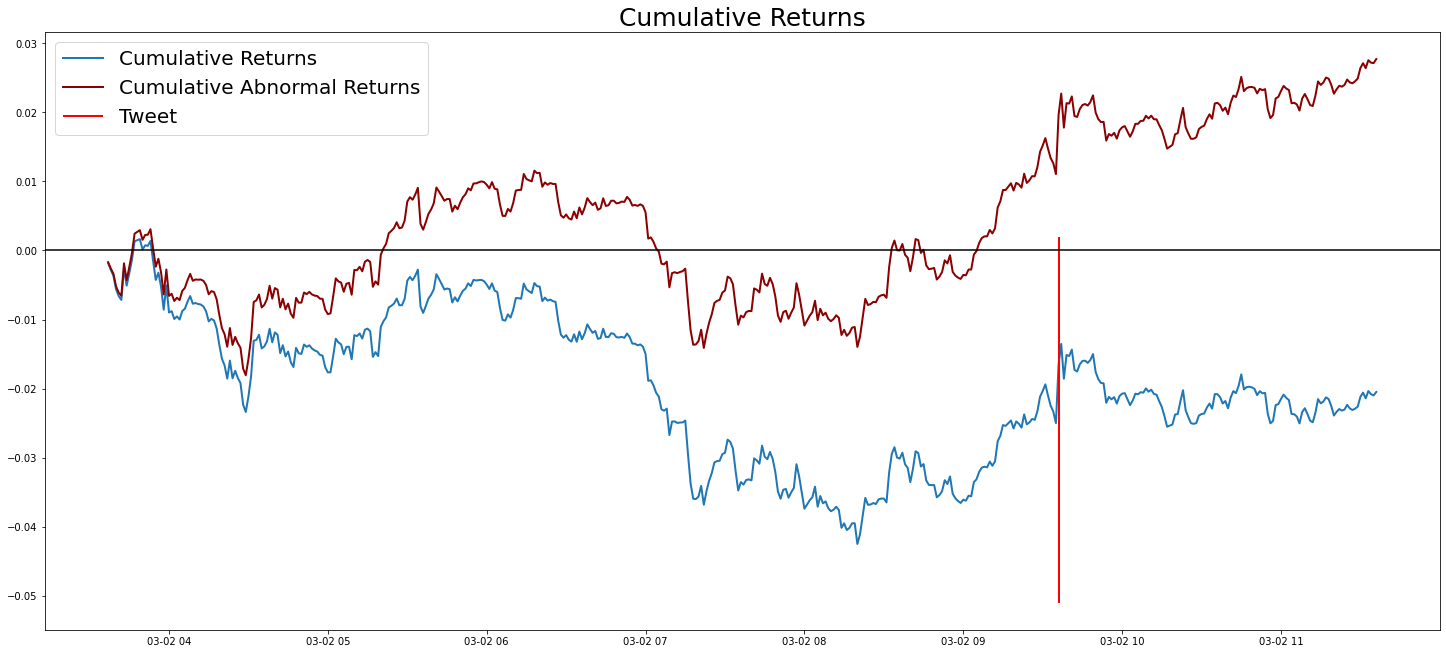

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  0.00010887077577759035
T[0; 1] =  36.55281316950707
T[0; 5] =  1.5140698722431378
T[0; 10] =  1.176575069870311
T[0; 30] =  1.3618579190372155
T[0; 60] =  0.8162765245107151
T[0; 120] =  0.8408349805896936


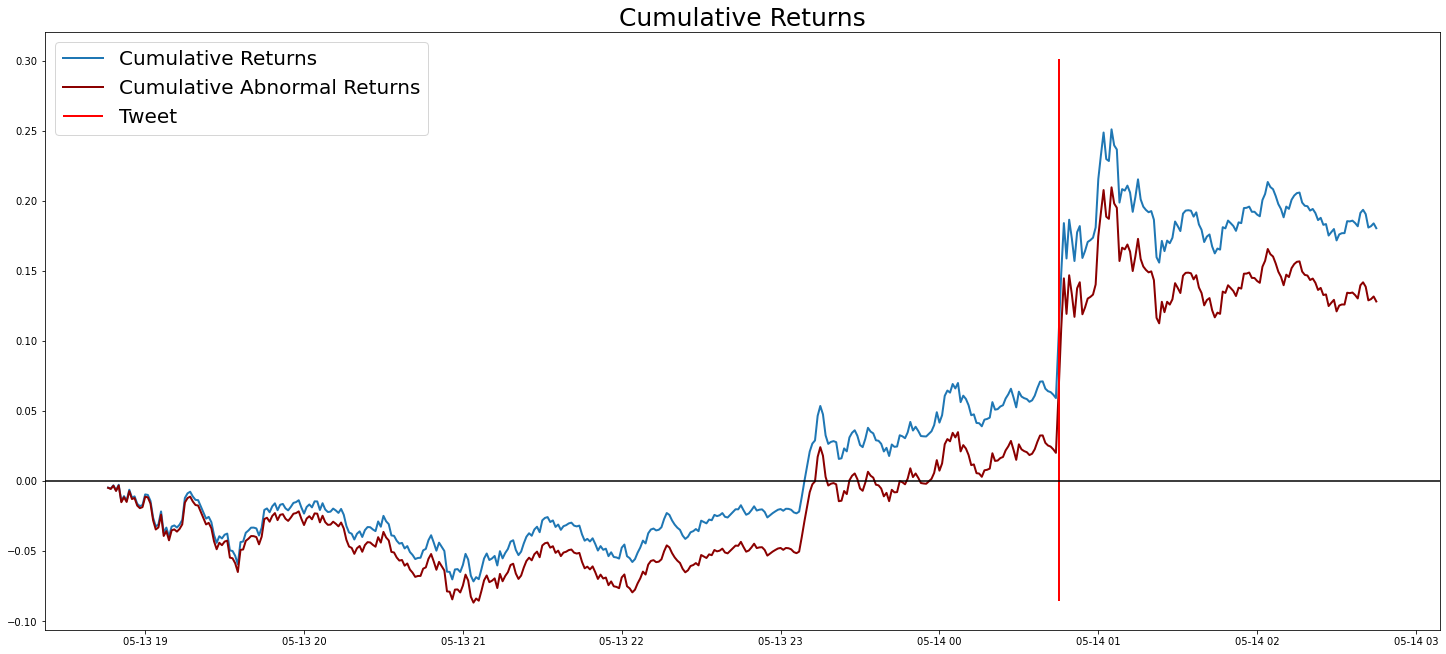

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -4.16072305960986e-05
T[0; 1] =  0.16153040822757547
T[0; 5] =  0.6979062495460139
T[0; 10] =  0.3200655677239611
T[0; 30] =  0.42702575838081386
T[0; 60] =  0.43417457183770564
T[0; 120] =  0.4538281960088398


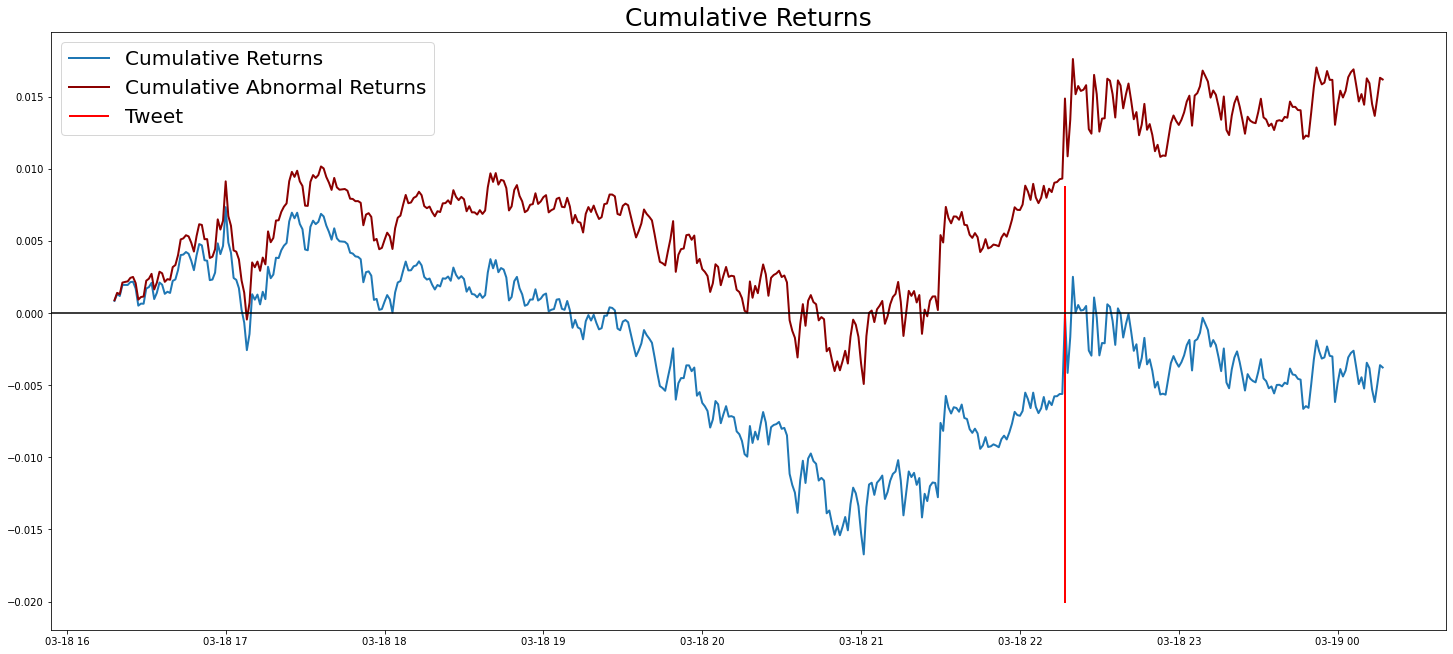

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -4.17082796415421e-05
T[0; 1] =  0.7837267944480083
T[0; 5] =  0.7924927102959738
T[0; 10] =  0.33162665164075167
T[0; 30] =  0.29951329864468373
T[0; 60] =  0.019810139480682498
T[0; 120] =  -0.18680282408573773


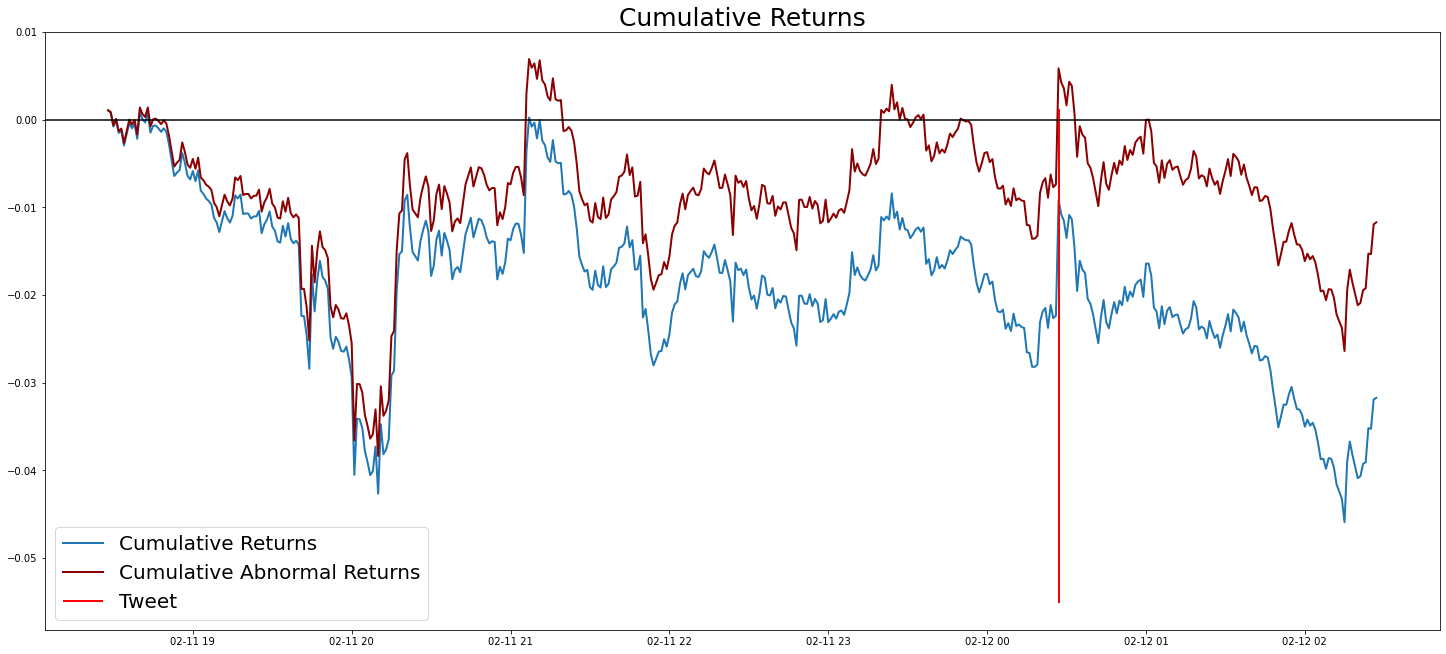

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -1.6371252156740373e-05
T[0; 1] =  4.1542470959974205
T[0; 5] =  2.958943059495974
T[0; 10] =  2.32398132209881
T[0; 30] =  1.7585705002047394
T[0; 60] =  2.2041010885233048
T[0; 120] =  1.5182479258619295


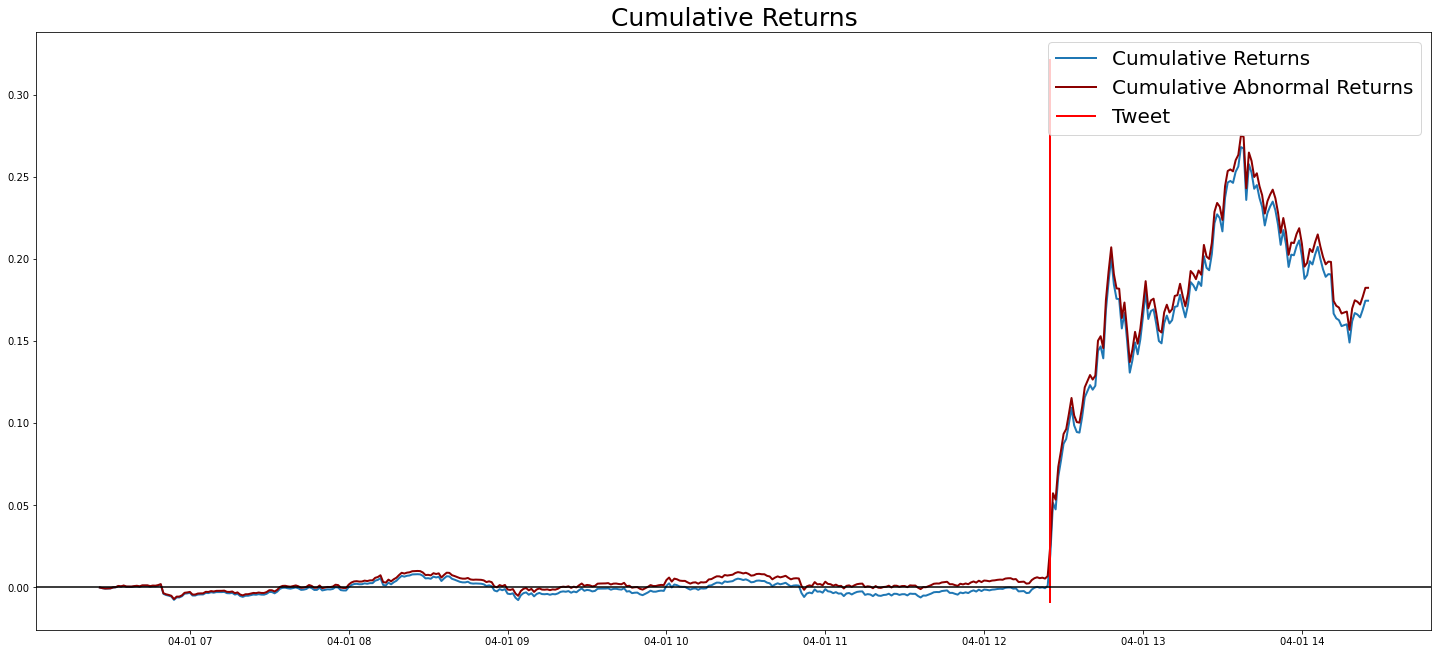

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  0.0003817275321941493
T[0; 1] =  5.341888777574503
T[0; 5] =  2.443118029056409
T[0; 10] =  0.8495380842379692
T[0; 30] =  0.2537131971035636
T[0; 60] =  -0.09489119750266413
T[0; 120] =  -0.6602655909157705


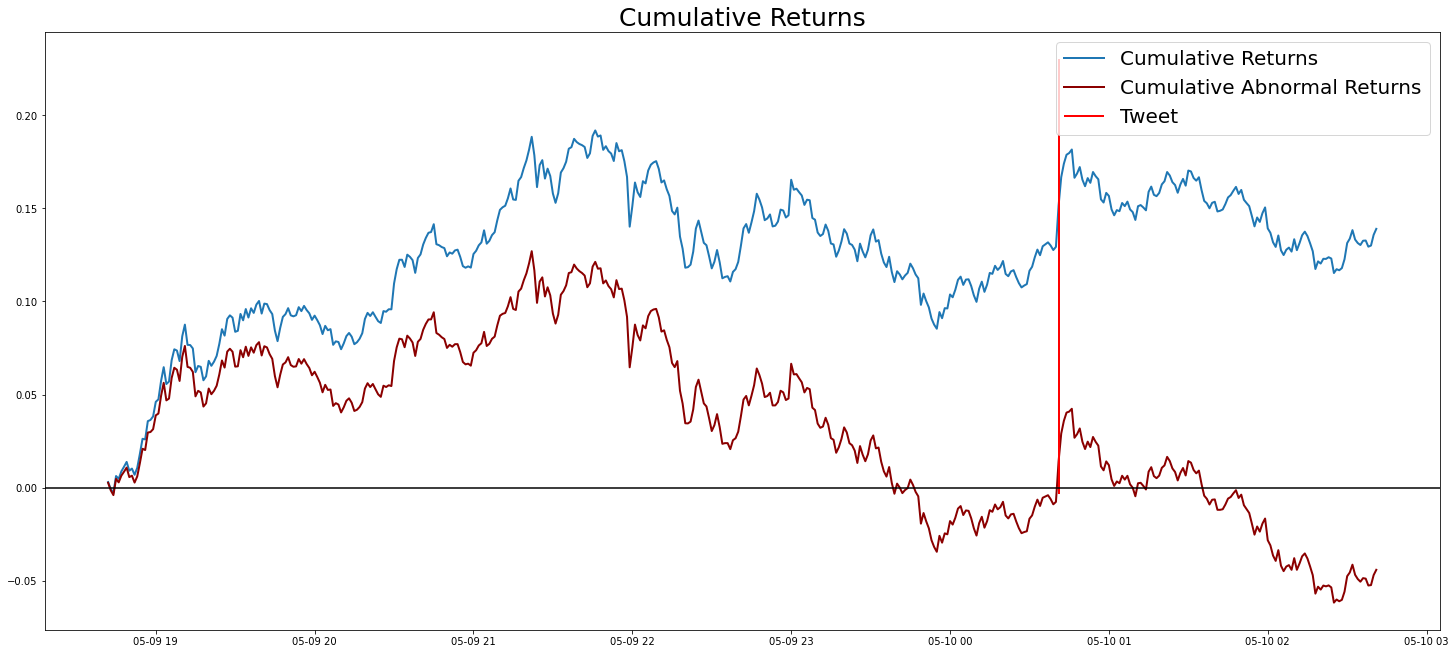

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  -1.408314672051439e-05
T[0; 1] =  5.211132674486299
T[0; 5] =  0.9740316765177042
T[0; 10] =  0.6902910076976517
T[0; 30] =  0.448255229804778
T[0; 60] =  0.5482937402687413
T[0; 120] =  0.5473907514361356


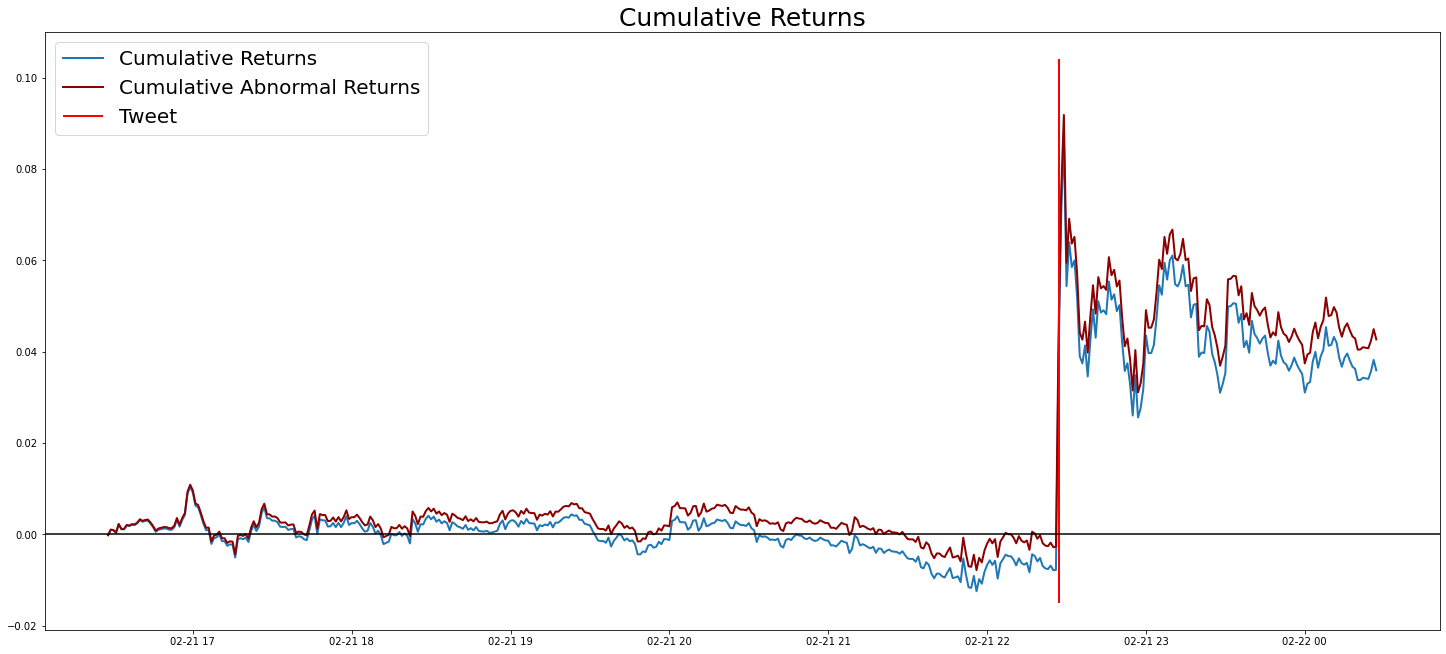

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  0.00031219382768720745
T[0; 1] =  19.131575808068394
T[0; 5] =  1.090932677314183
T[0; 10] =  0.3055742311943549
T[0; 30] =  -0.16476521355672158
T[0; 60] =  -0.15375483830857314
T[0; 120] =  -0.8498693763890078


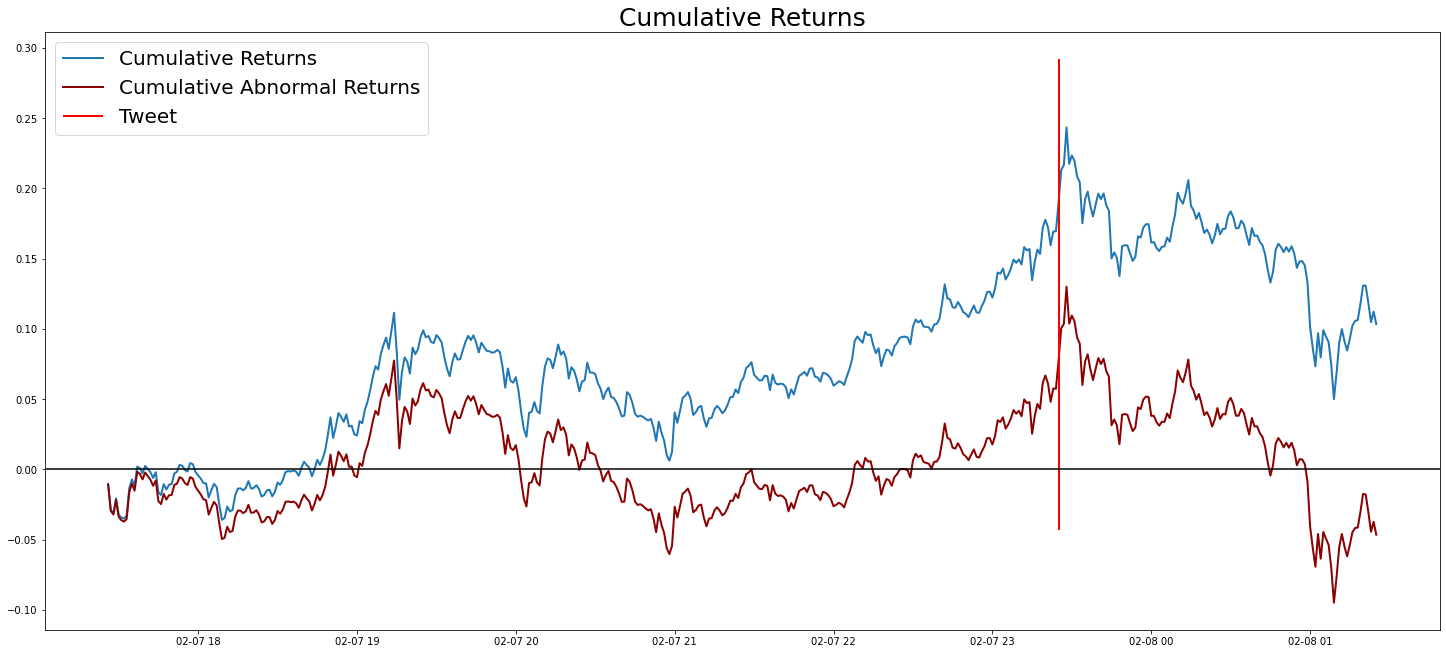

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\1494792337.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced.loc[0, 'log_returns'] = 0


Expected Return =  1.83223221846963e-05
T[0; 1] =  4.222892007230923
T[0; 5] =  2.237424241569305
T[0; 10] =  3.0053547210254563
T[0; 30] =  1.9540934686438989
T[0; 60] =  1.6782716927793644
T[0; 120] =  0.9518271139073285


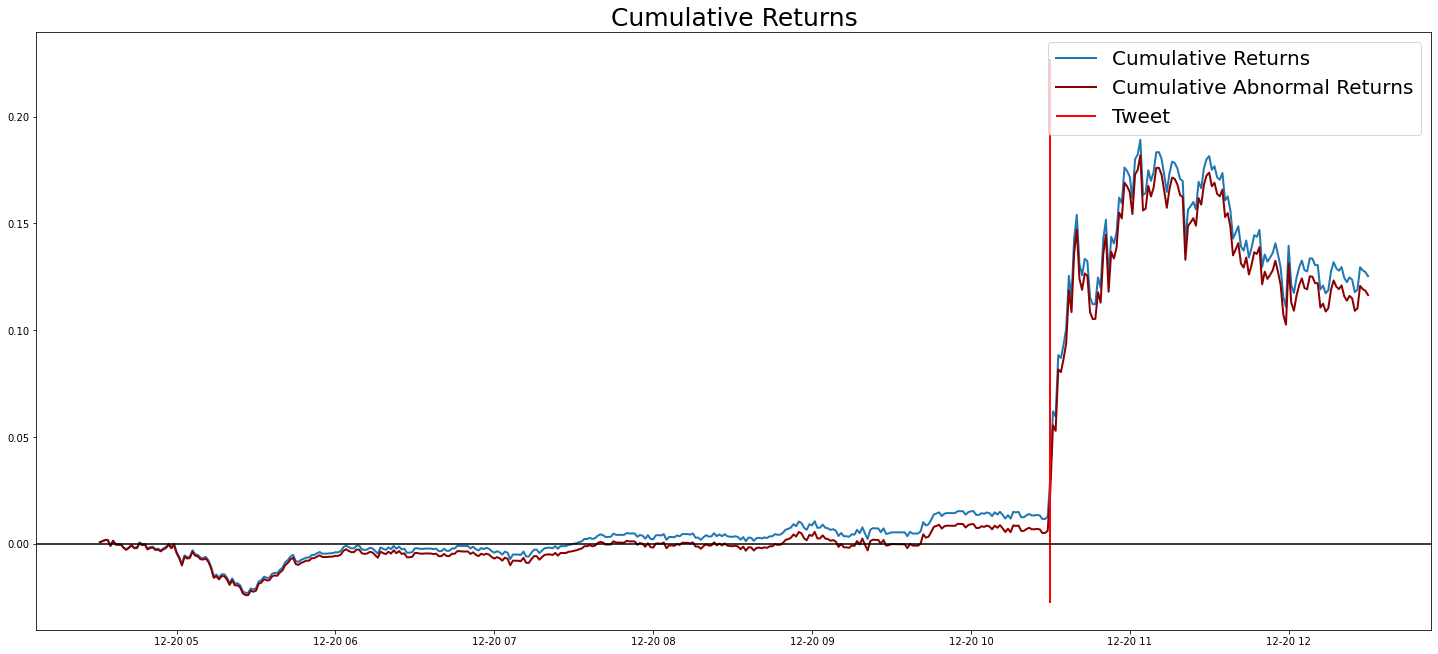

ar_frame:
        AR_0      AR_1      AR_2      AR_3      AR_4      AR_5      AR_6  \
0   0.019977  0.012351  0.002259 -0.004519  0.002335  0.001726 -0.002268   
1   0.000881 -0.001224 -0.000187 -0.000013 -0.003136 -0.000601  0.000473   
2   0.009695  0.001679  0.001283  0.001715  0.001175 -0.001651   0.00431   
3   0.032823  0.018142 -0.008096 -0.007274 -0.007263 -0.000272  0.000021   
4   0.004594 -0.007438  0.000037  0.004818  0.001954 -0.006823 -0.004963   
5   0.036633  0.059703  0.037512  0.001326  0.018879 -0.034939  0.016267   
6   0.008927  0.025804  0.023444 -0.003585 -0.001872  0.021135  -0.00783   
7   0.000256 -0.001738  0.005132 -0.000361 -0.000121 -0.001081 -0.000396   
8   0.035265  0.023415  0.026296  0.026363  0.008207  0.005409  0.015006   
9    0.00904 -0.001205 -0.000594 -0.000616 -0.005531 -0.000832 -0.002049   
10  0.008581  0.003069  -0.00493  0.003541 -0.000059  0.001031 -0.002833   
11  0.043251  0.045684  0.035555 -0.025347  0.027536 -0.013409 -0.016251   
12

In [44]:
df['Date'] = df['timestamp'].apply(lambda x: dt.fromtimestamp(x))


ar_ges = pd.DataFrame(columns=['AR_0', 'AR_1', 'AR_2', 'AR_3', 'AR_4', 'AR_5', 'AR_6', 'AR_7', 'AR_8', 'AR_9', 'AR_10', ])
car_ges = pd.DataFrame(columns = ['CAR_1', 'CAR_2', 'CAR_5', 'CAR_10', 'CAR_30', 'CAR_60', 'CAR_120'])

for _, tweet in df_tweets_relevant.iterrows():
    timestamp = tweet['timestamp']
    doge_sliced = df[(df['timestamp'] >= timestamp-360*60) & (df['timestamp'] <= timestamp+120*60)]
    # Es werden nach Tweets gesucht, die 240 Minuten vor und 100 Minuten nach dem Event stattgefunden haben.
    tweets_sliced = df_tweets[(df_tweets['timestamp'] >= timestamp-240*60) & (df_tweets['timestamp'] <= timestamp+100*60)]
    
    # Ausrechnen der Renditen
    doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
    # Erste Rendite wird 0 gesetzt
    doge_sliced.loc[0, 'log_returns'] = 0
    # Kumulierte Renditen
    doge_sliced['cum_log_returns'] = np.cumsum(doge_sliced['log_returns'])

    # Expected Returns which are based on the mean value of the returns of the last 5 hours before the tweet.
    # Event Takes place at t=360
    expected_return = np.mean(doge_sliced['log_returns'].iloc[1:301]) # Fehler bei Ante, da Ante 1:301 nimmt und nicht 0:300
    print('Expected Return = ', expected_return)
    
    # Abnormal Returns based on After Returns - Mean Value of Returns (before Tweet)
    doge_sliced['abnormal_returns'] = doge_sliced['log_returns'] - expected_return
    doge_sliced['abnormal_returns_cum'] = np.cumsum(doge_sliced['abnormal_returns'])


    ar_values = []
    for event_horizon in range(11):
        ar_values.append(doge_sliced['abnormal_returns'].iloc[360+event_horizon])
    ar_ges = pd.concat([ar_ges, pd.DataFrame([ar_values], columns=ar_ges.columns)], ignore_index=True)



    car_values = []
    for event_horizon in [1, 2, 5, 10, 30, 60, 120]:
        car_values.append(doge_sliced['abnormal_returns'].iloc[360:360+event_horizon+1].sum())
    car_ges = pd.concat([car_ges, pd.DataFrame([car_values], columns=car_ges.columns)], ignore_index=True)

    # T-Statistiken für [1, 5, 10, 30, 60, 120]
    for event_horizon in [1, 5, 10, 30, 60, 120]:
        print(f'T[0; {event_horizon}] = ', (doge_sliced['abnormal_returns'].iloc[360:360+event_horizon+1].mean() / doge_sliced['abnormal_returns'].iloc[360:360+event_horizon+1].std()) * np.sqrt(event_horizon+1)) # <-- richtiger Wert
        
    fig = plt.figure(1, figsize = (25, 11))
    plt.plot(doge_sliced["Date"], doge_sliced['cum_log_returns'], lw=2, label='Cumulative Returns')
    plt.plot(doge_sliced["Date"], doge_sliced['abnormal_returns_cum'], lw=2, label='Cumulative Abnormal Returns', color='darkred')
    plt.vlines(dt.fromtimestamp(timestamp), label='Tweet', ymin=doge_sliced['cum_log_returns'].min()*1.2, ymax=doge_sliced['cum_log_returns'].max()*1.2, colors='red', lw=2) 

    if len(tweets_sliced) > 1:
        plt.vlines([dt.fromtimestamp(i) for i in tweets_sliced['timestamp'] if i != timestamp], label='Other Tweets', ymin=0, ymax=doge_sliced['abnormal_returns_cum'].max()*1.2, colors='orange', lw=2) 
    plt.axhline(0, color = 'black')
    plt.legend(loc='best', fontsize=20)
    plt.title('Cumulative Returns', size=25)

    plt.show()

print('ar_frame:')
print(ar_ges)

print('car_frame:')
print(car_ges)

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


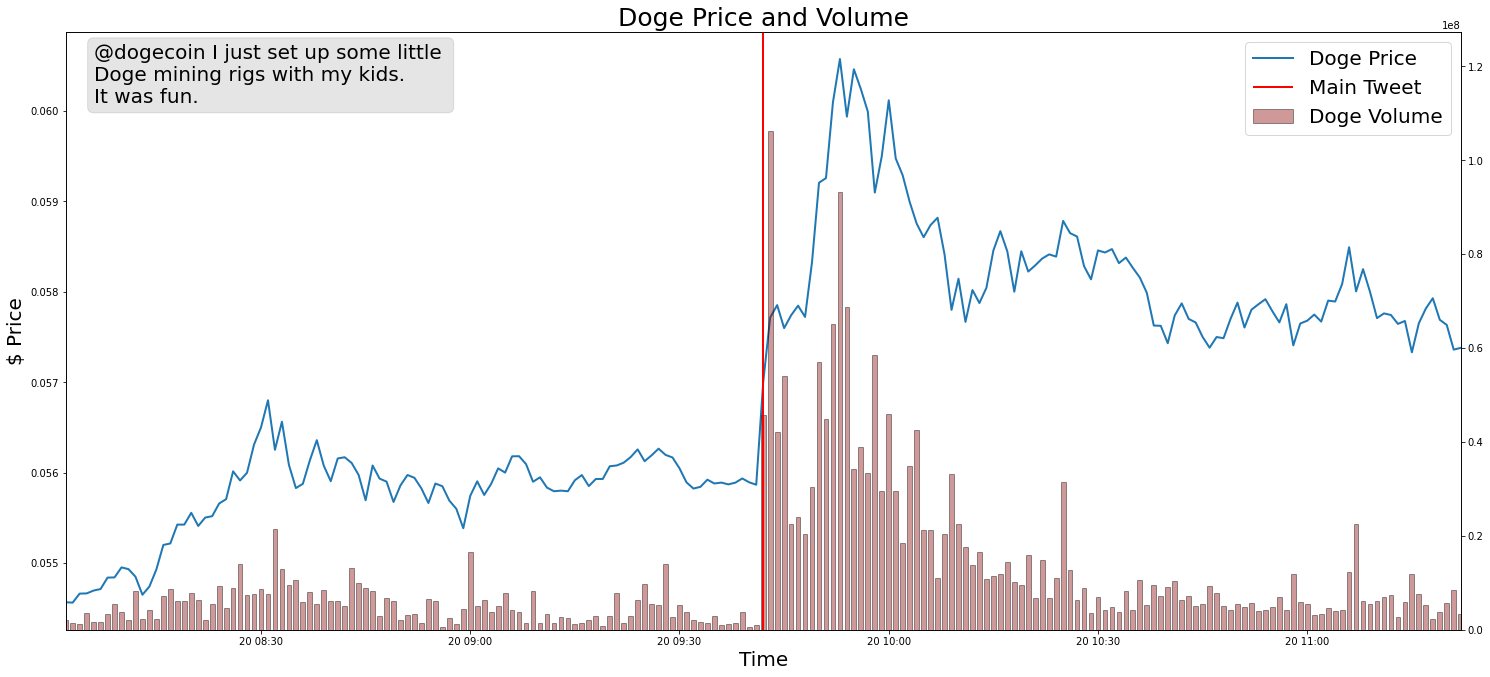

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


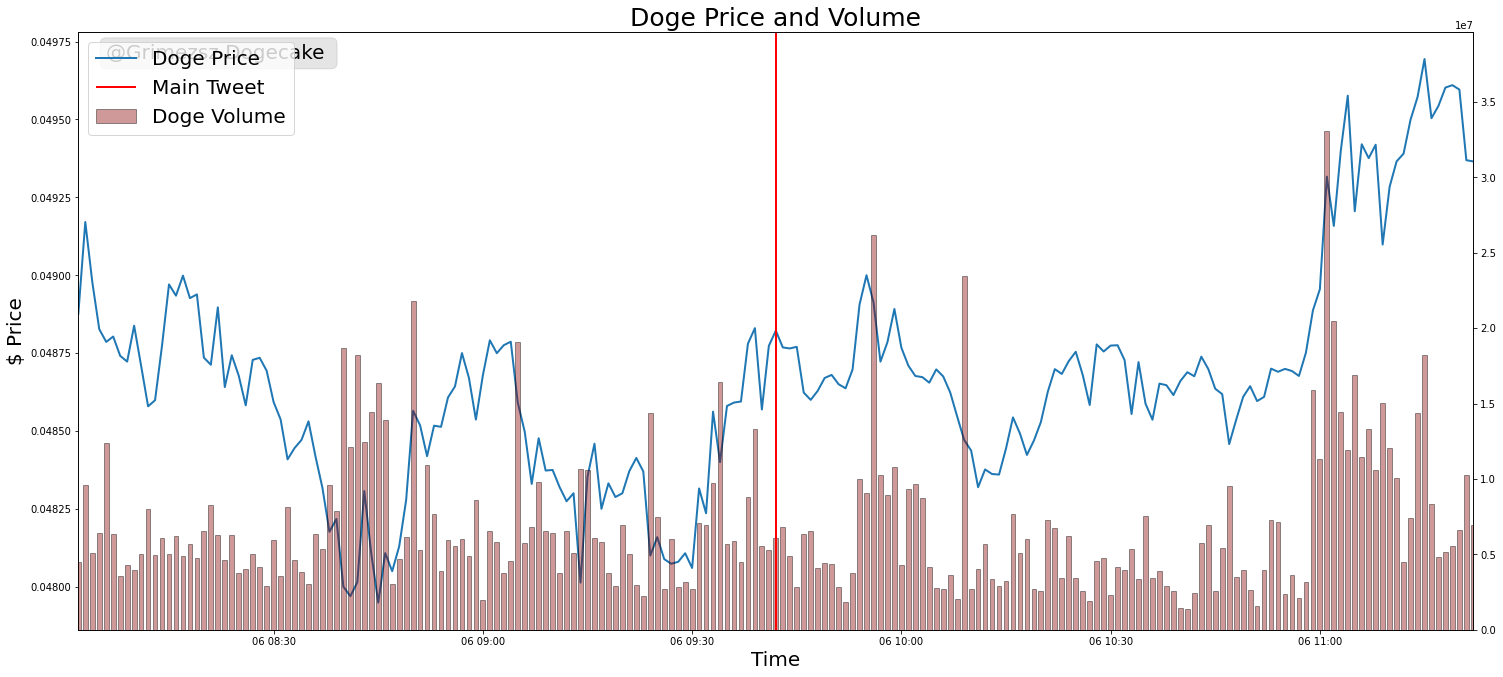

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


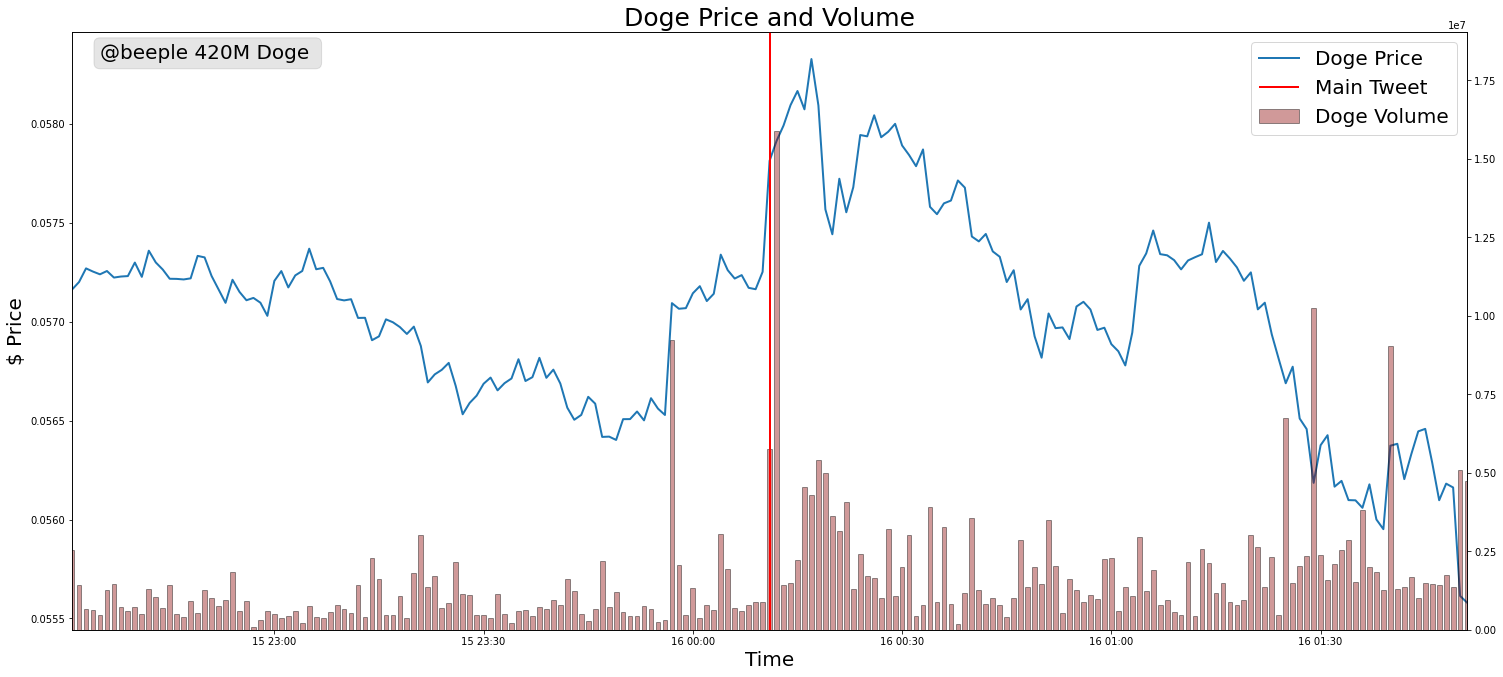

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


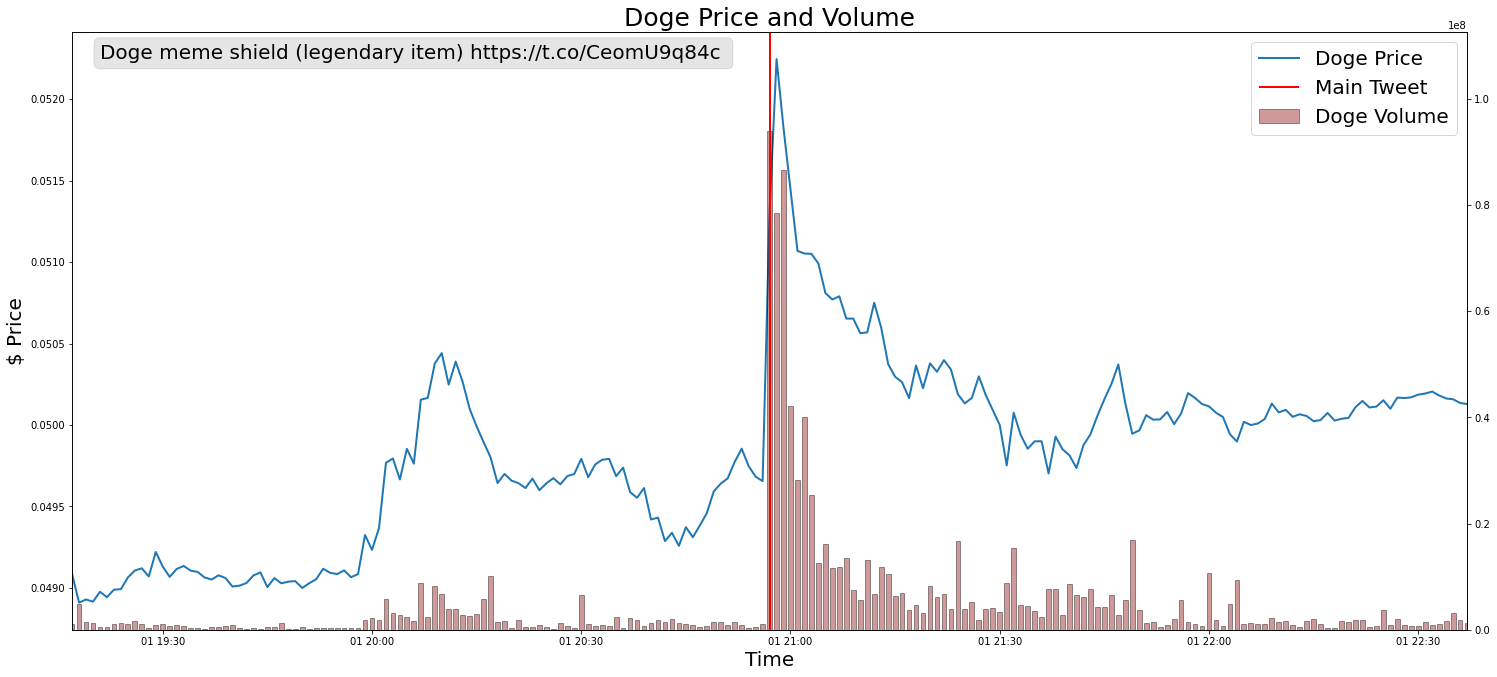

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


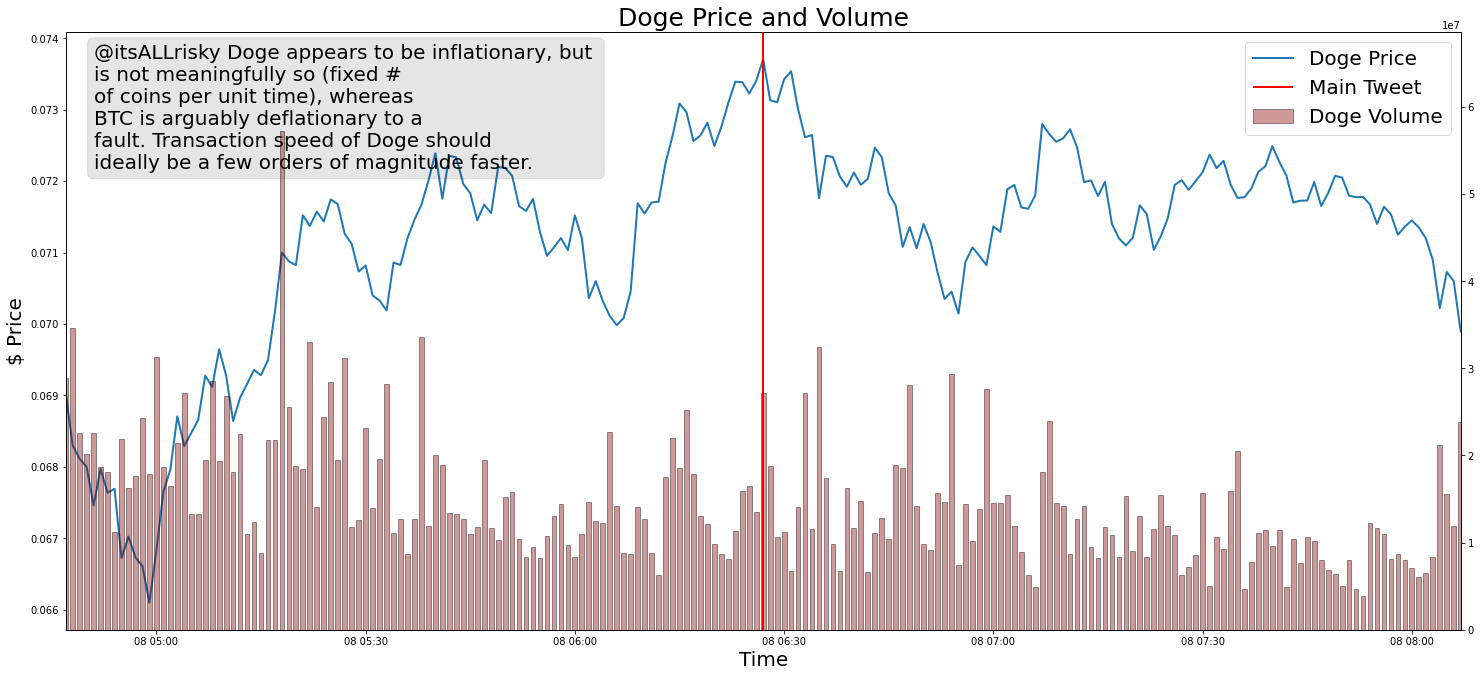

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


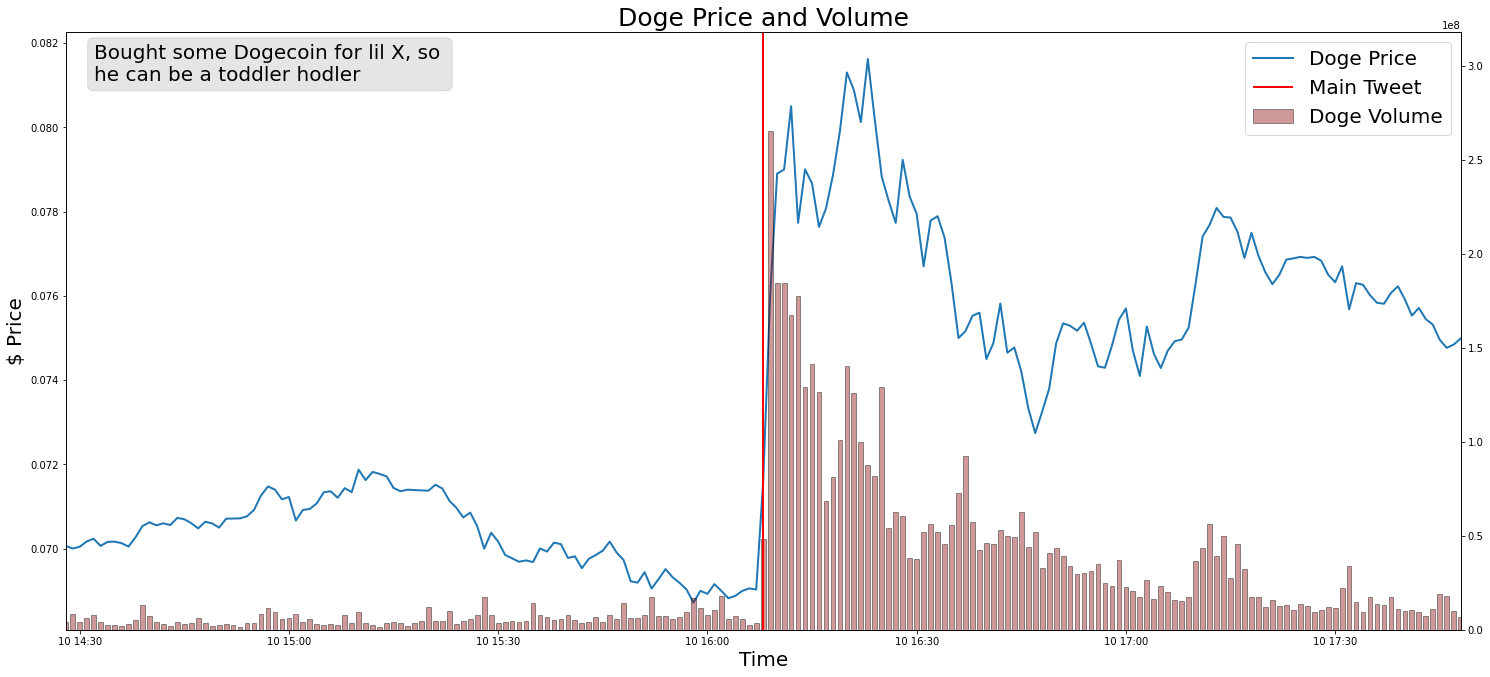

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


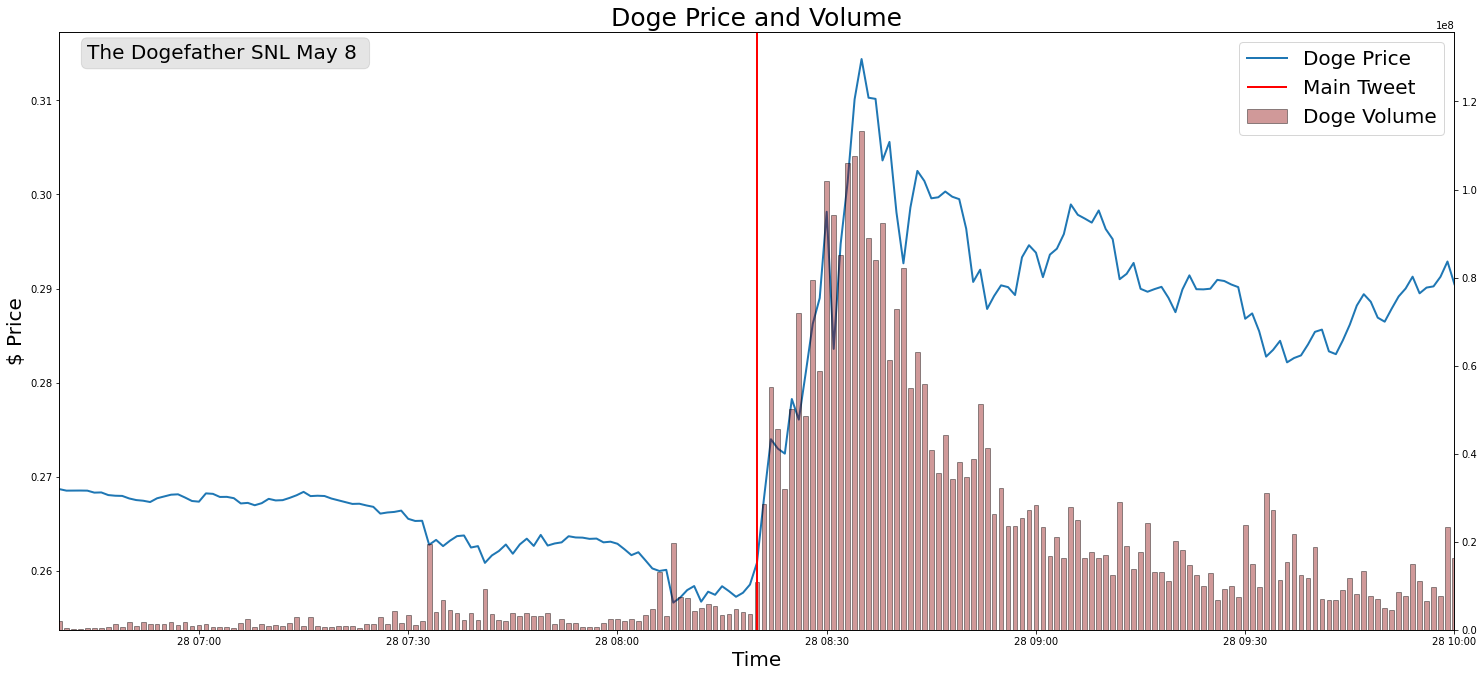

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


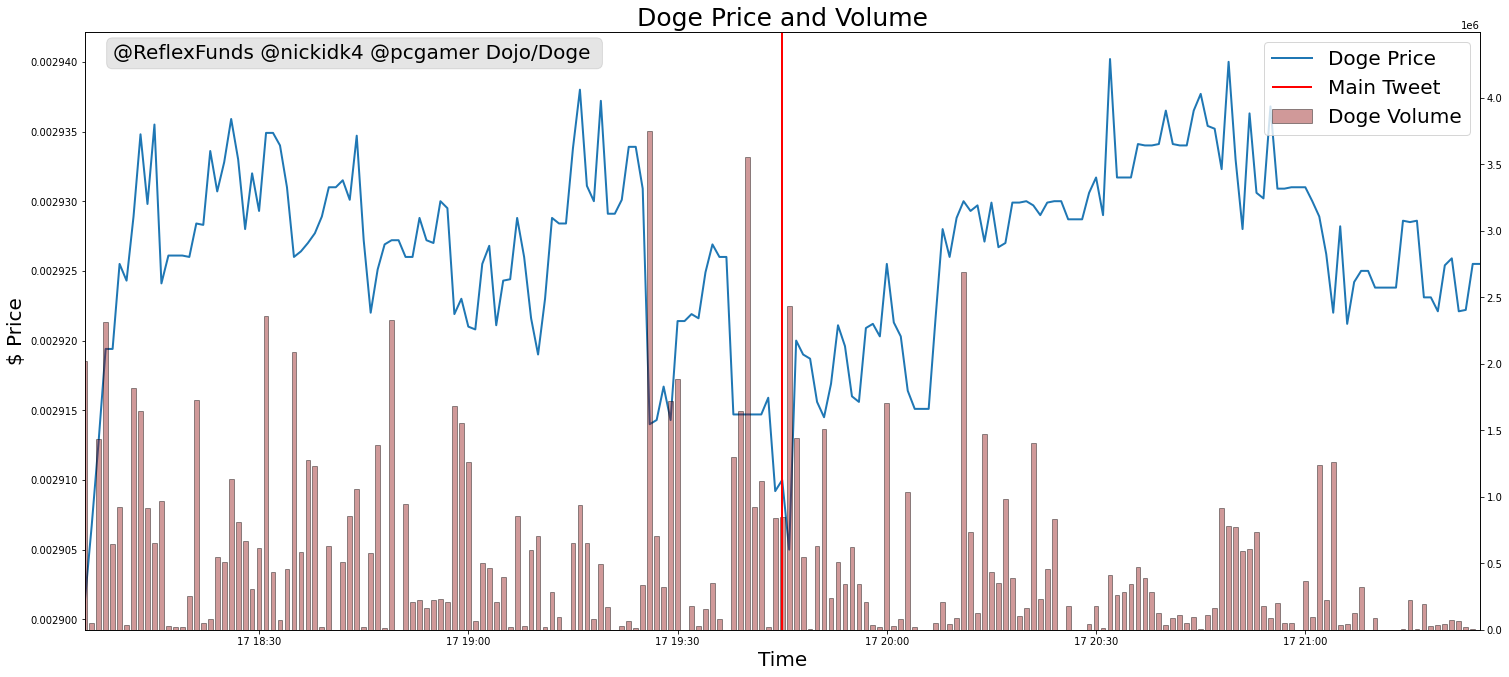

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


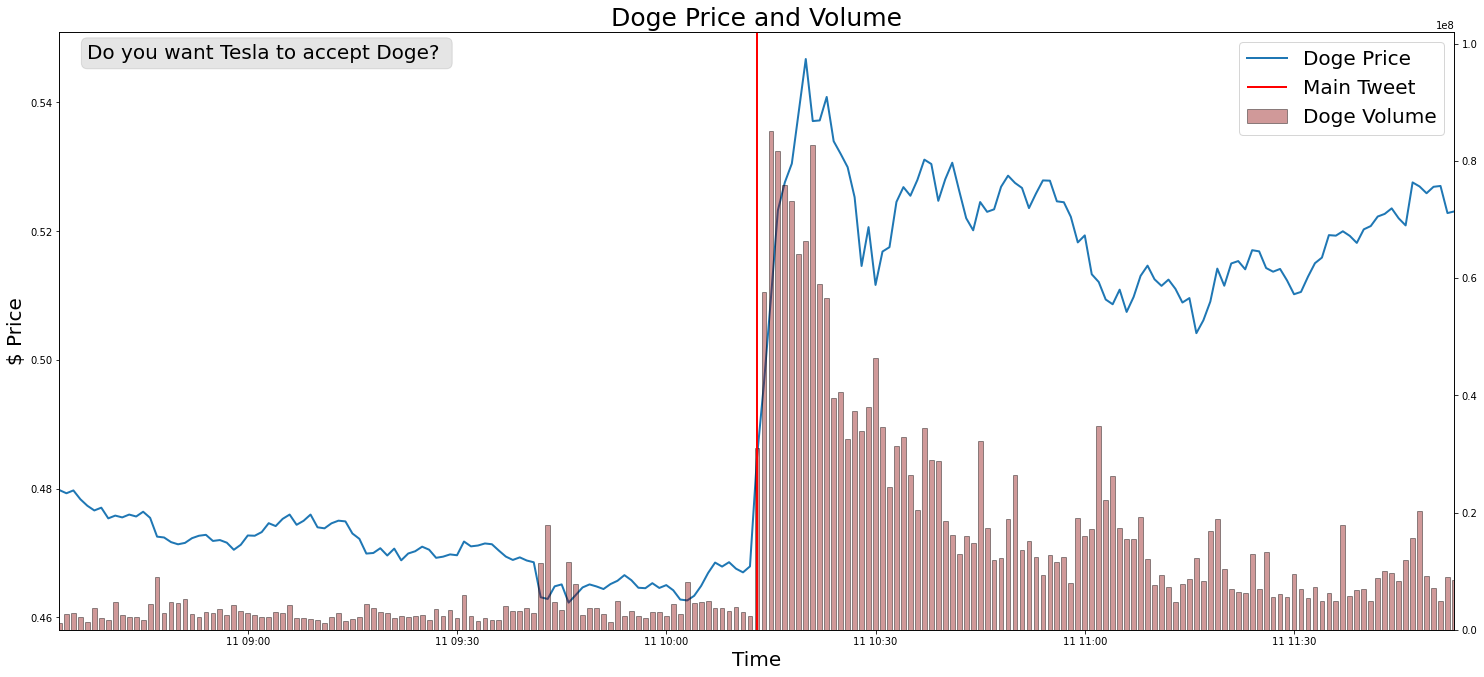

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


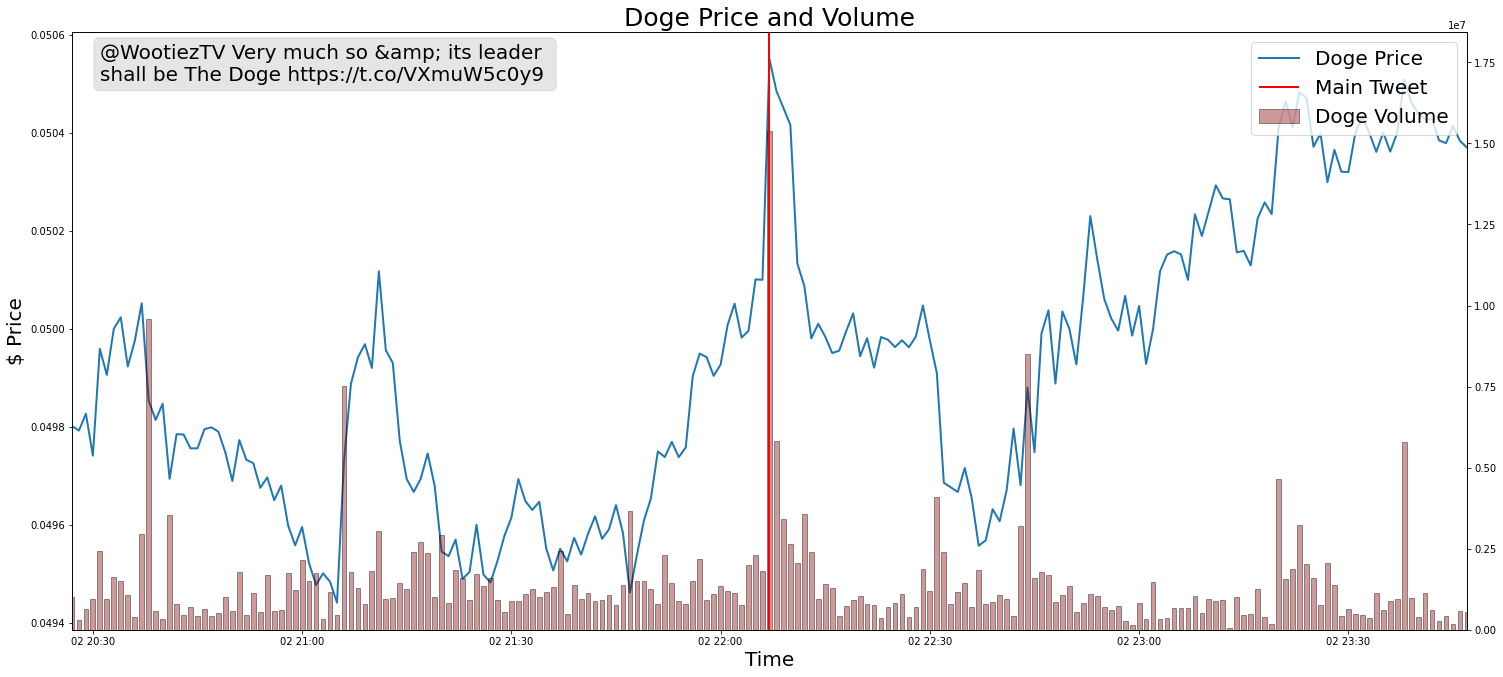

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


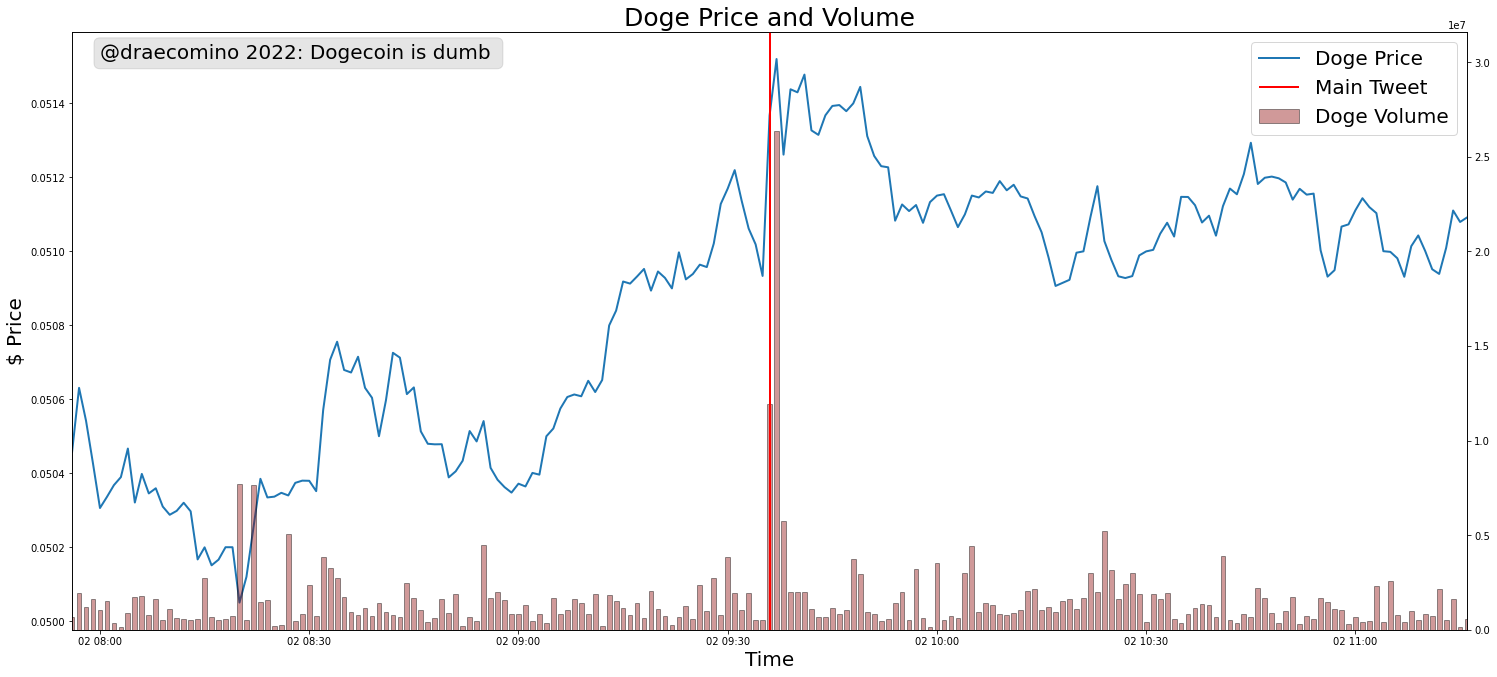

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


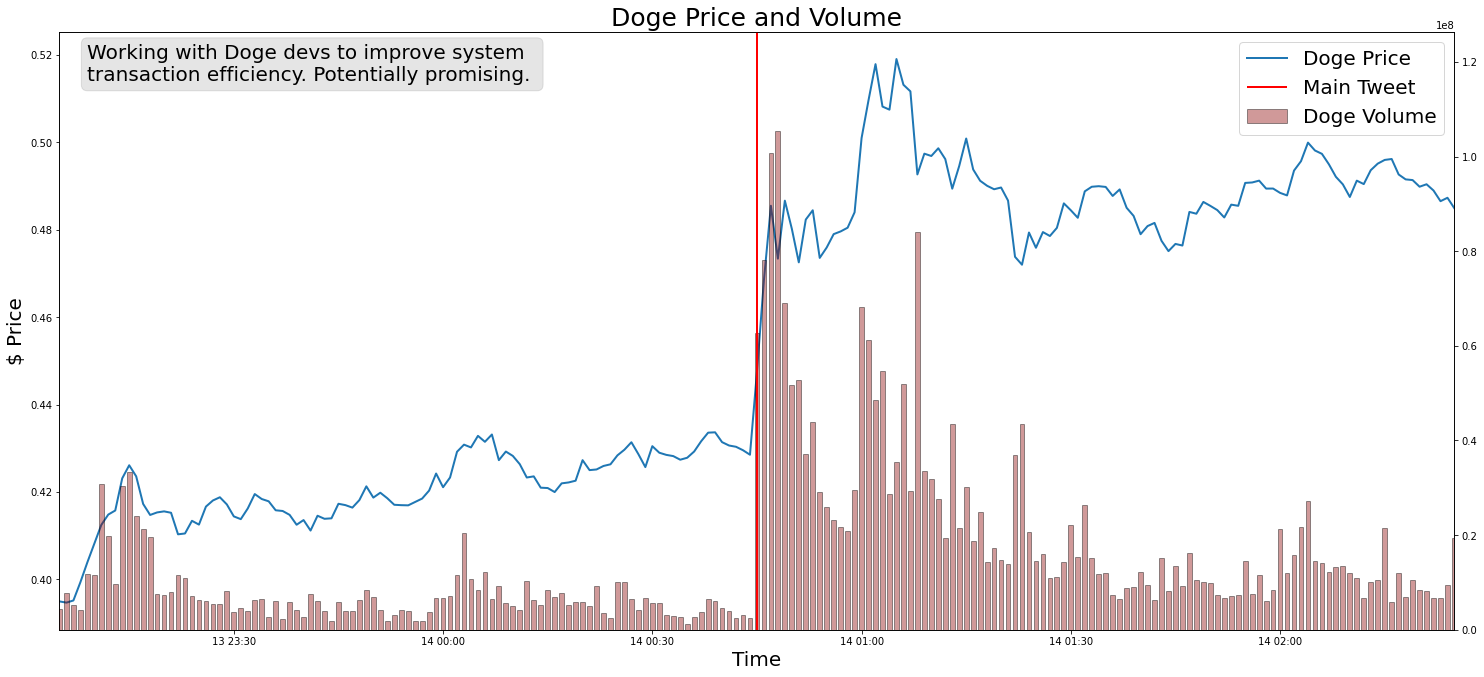

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


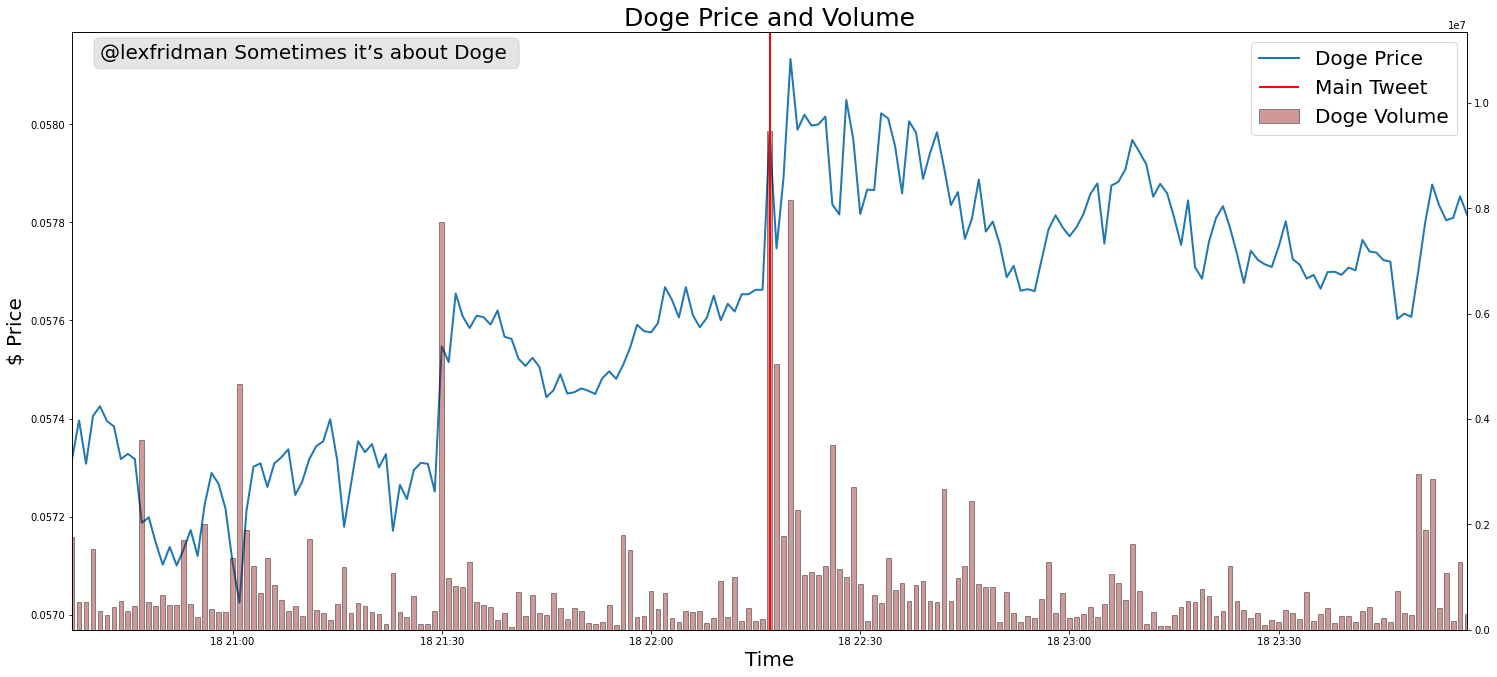

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


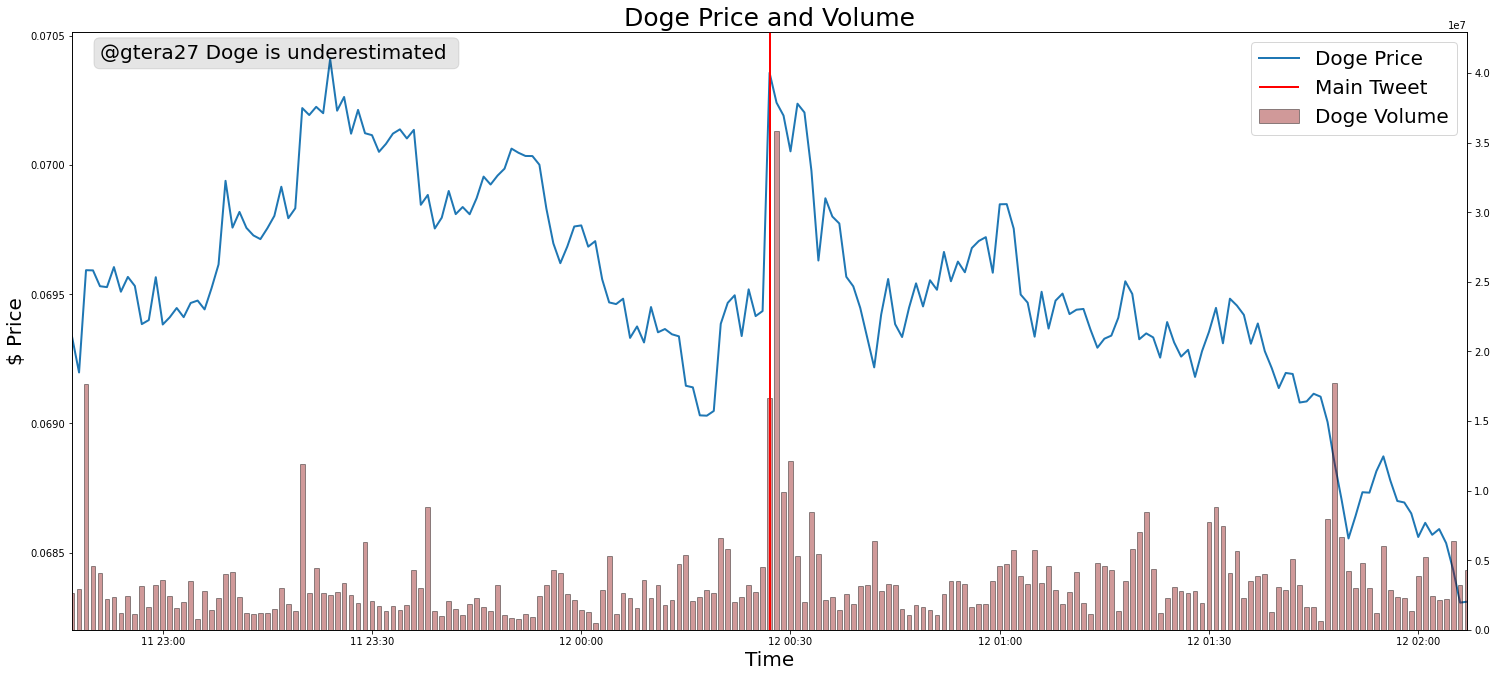

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


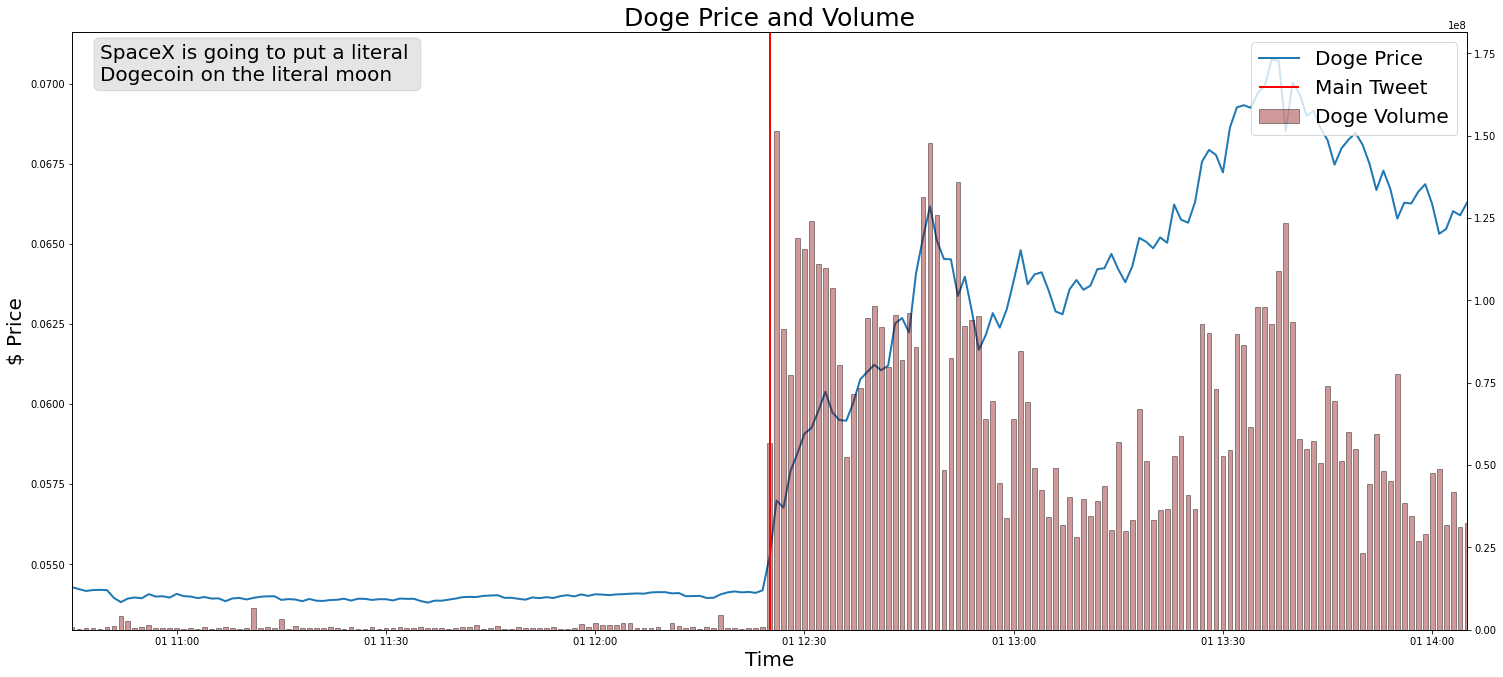

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


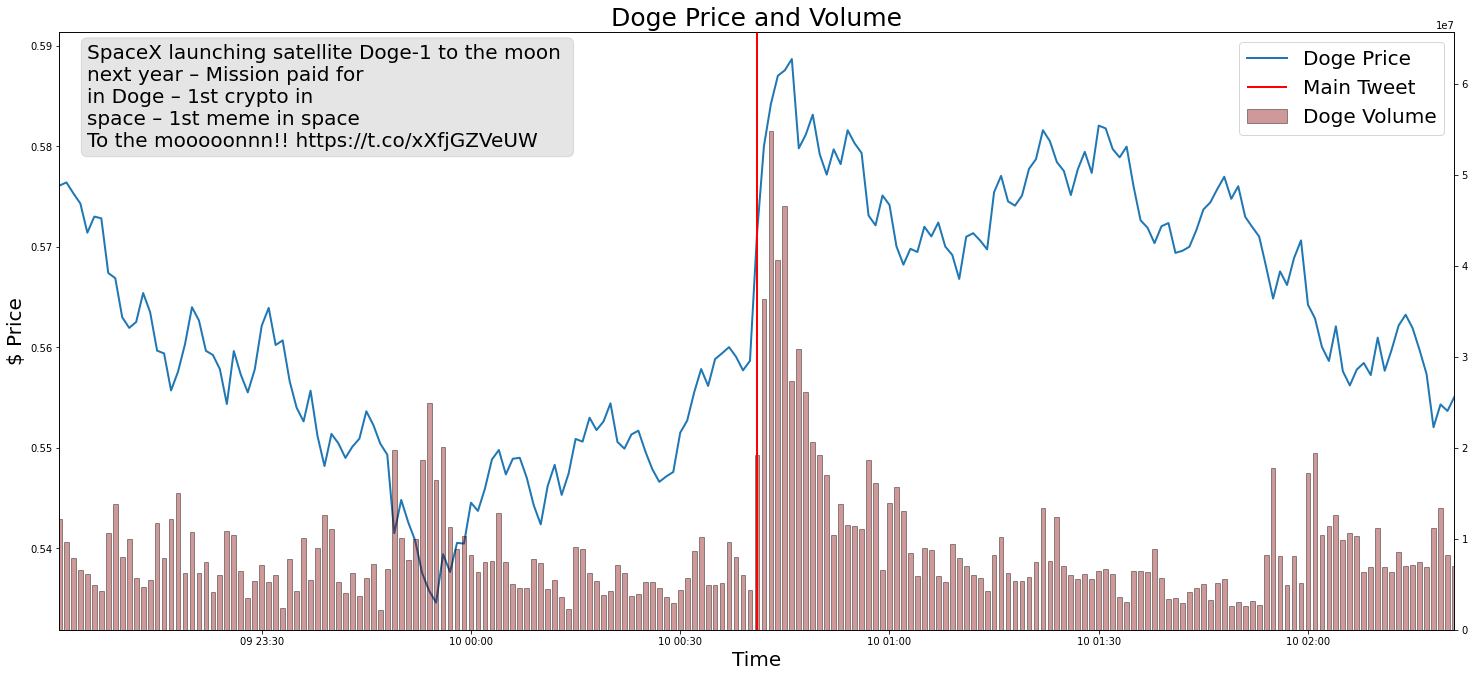

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


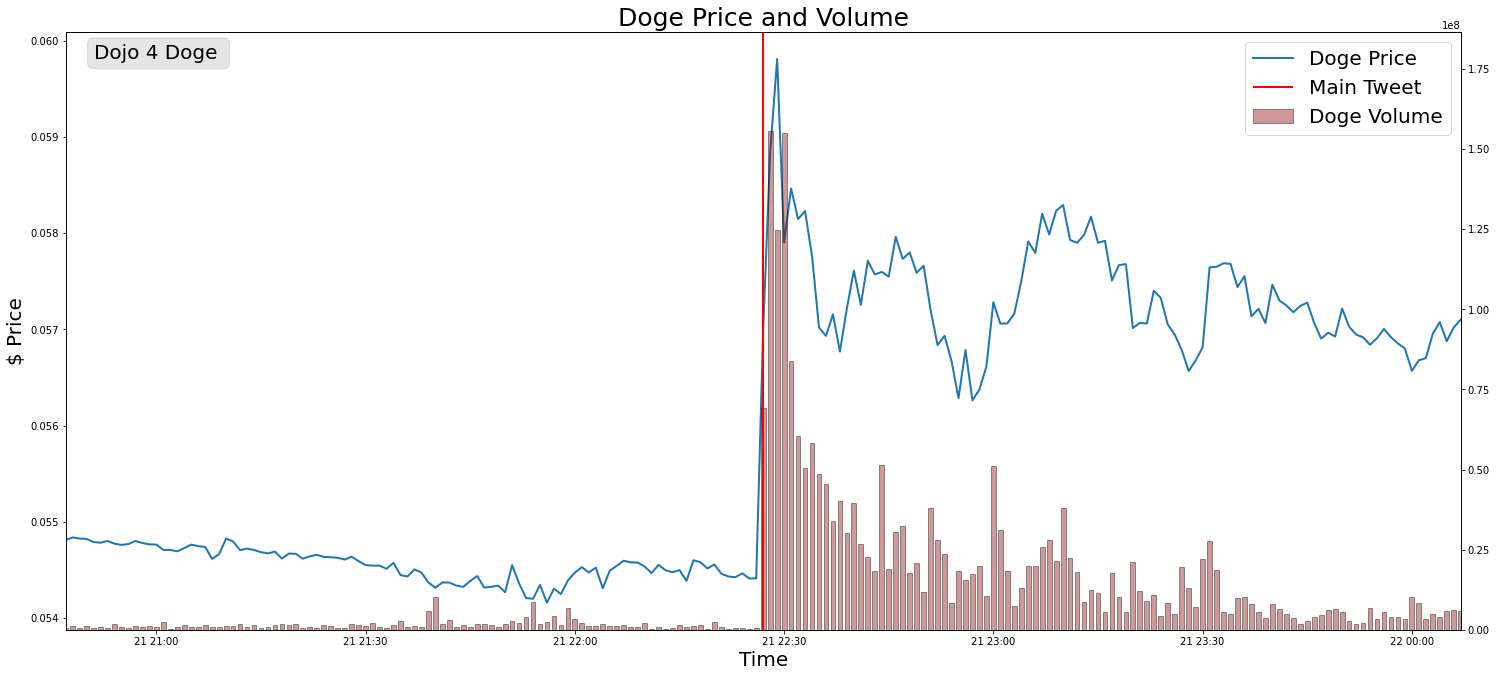

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value
C:\Users\ckopp\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


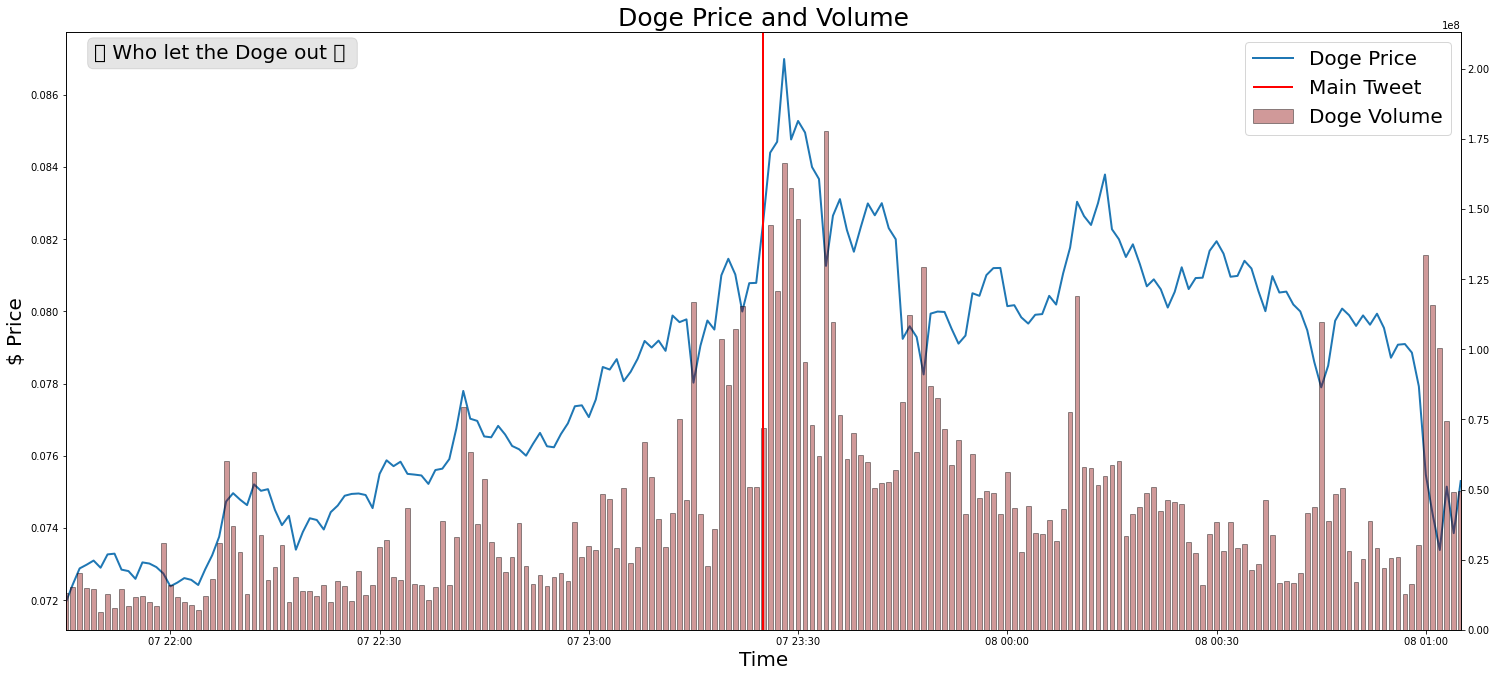

C:\Users\ckopp\AppData\Local\Temp\ipykernel_21040\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


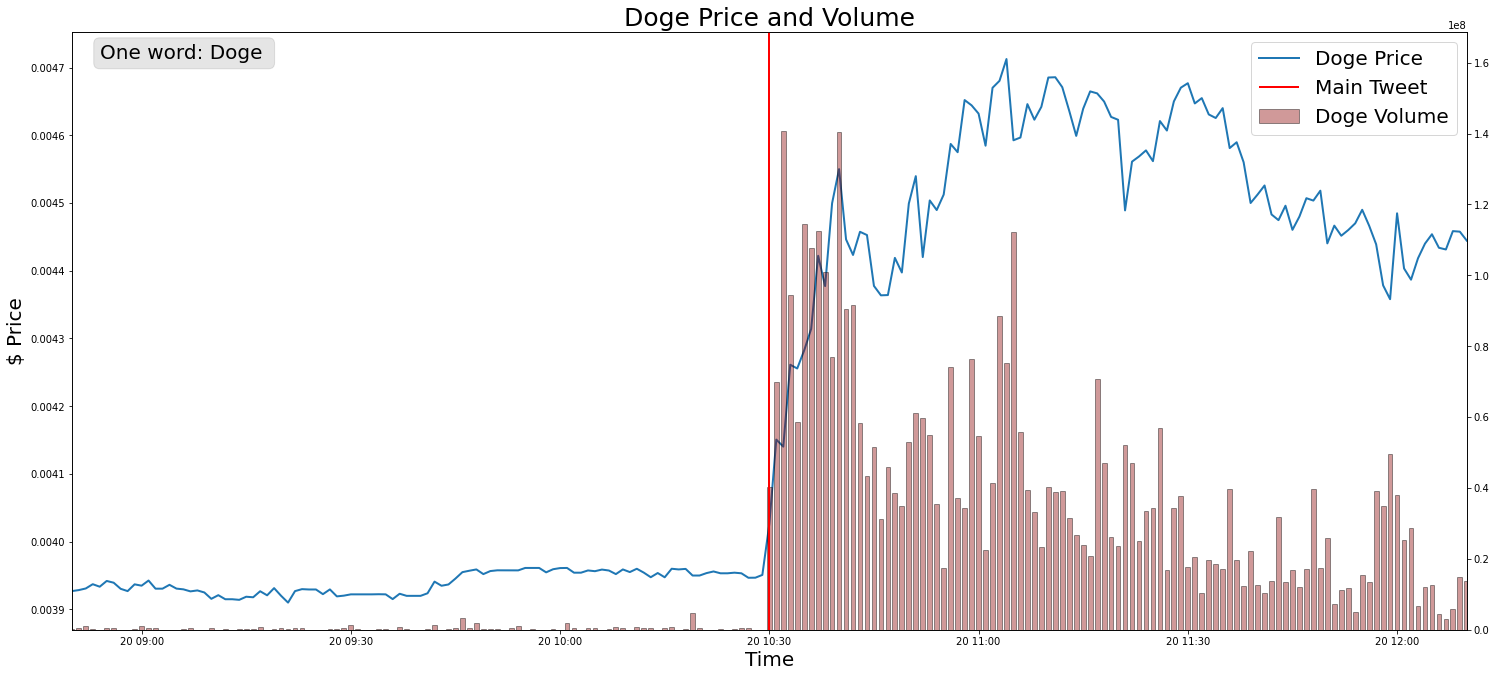

In [40]:
df['Date'] = df['timestamp'].apply(lambda x: dt.fromtimestamp(x))

for _, tweet in df_tweets_relevant.iterrows():
    timestamp = tweet['timestamp']
    doge_sliced = df[(df['timestamp'] >= timestamp-100*60) & (df['timestamp'] <= timestamp+100*60)]
    tweets_sliced = df_tweets[(df_tweets['timestamp'] >= timestamp-100*60) & (df_tweets['timestamp'] <= timestamp+100*60)]

    base_value = doge_sliced.iloc[0, 4]
    doge_sliced['CAR'] = doge_sliced['Close']/base_value

    fig = plt.figure(1, figsize = (25, 11))
    ax = fig.add_subplot(111)
    ax.plot(doge_sliced['Date'], doge_sliced['Close'], lw=2, label="Doge Price")

    ax2 = ax.twinx()
    ax2.bar(doge_sliced['Date'], doge_sliced['Volume'], label="Doge Volume", color='darkred', alpha=0.4, width=1/(35*60), edgecolor='black')
    ax2.vlines(dt.fromtimestamp(timestamp), label='Main Tweet', ymin=0, ymax=doge_sliced['Volume'].max()*1.2, colors='red', lw=2) 

    if len(tweets_sliced) > 1:
        ax2.vlines([dt.fromtimestamp(i) for i in tweets_sliced['timestamp'] if i != timestamp], label='Other Tweets', ymin=0, ymax=doge_sliced['Volume'].max()*1.2, colors='orange', lw=2) 
   
    ax2.set_ylim(0, doge_sliced['Volume'].max()*1.2)
    ax.set_xlim(min(doge_sliced['Date']), max(doge_sliced['Date']))
    ax.set_xlabel("Time", size=20)
    ax.set_ylabel("$ Price", size=20)

    t = [i + ' ' for i in tweet['Text'].split()]
    for i in range(7, len(t), 7):
        t.insert(i, '\n')
    anno = ''.join(t)

    ax.text(0.02, 0.98, anno, transform=ax.transAxes, bbox={'boxstyle':'round', 'facecolor':'black', 'alpha':0.1}, fontsize = 20, va='top')
    

    li, la = ax.get_legend_handles_labels()
    li2, la2 = ax2.get_legend_handles_labels()
    plt.legend(li+li2, la+la2, loc='best', fontsize = 20)
    # plt.legend(loc='best', fontsize=20)
    plt.title('Doge Price and Volume', size=25)

    plt.show()

    #print(tweet['Text'])

In [41]:
# log(x+1)
# 1. Schritt log(vol +1)
# 2. Schritt E(log(vol+1))
# 3. Schritt: log(vol+1) - E(log(vol+1))
# --> Abnormal Volume

In [42]:
a = [1, 2, 3, 4, 5]
print(a[0:3])

[1, 2, 3]


In [43]:
m = min(df_tweets['timestamp'])
min(df[df['timestamp'] > m]['Volume'])

0.0